### Conduct in-depth analysis and visualization of the training data (order_train1.csv).

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [65]:
data = pd.read_csv(r'D:\WeChat Files\wxid_qjqwisvw7xdr22\FileStorage\File\2025-01\order_train1.csv', encoding='gbk')

#### 1. Exploratory Data Analysis (EDA)

In [66]:
data.head(5)

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015/9/1,104,22069,307,403,offline,1114.0,19
1,2015/9/1,104,20028,301,405,offline,1012.0,12
2,2015/9/2,104,21183,307,403,online,428.0,109
3,2015/9/2,104,20448,308,404,online,962.0,3
4,2015/9/2,104,21565,307,403,offline,1400.0,3


In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597694 entries, 0 to 597693
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_date         597694 non-null  object 
 1   sales_region_code  597694 non-null  int64  
 2   item_code          597694 non-null  int64  
 3   first_cate_code    597694 non-null  int64  
 4   second_cate_code   597694 non-null  int64  
 5   sales_chan_name    597694 non-null  object 
 6   item_price         597694 non-null  float64
 7   ord_qty            597694 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 36.5+ MB
None


In [68]:
# Check for missing values in the 'data' DataFrame
print('Missing value for each data group\n', data.isnull().sum())

Missing value for each data group
 order_date           0
sales_region_code    0
item_code            0
first_cate_code      0
second_cate_code     0
sales_chan_name      0
item_price           0
ord_qty              0
dtype: int64


In [69]:
print('Repeated values：\n', data[data.duplicated()])

Repeated values：
         order_date  sales_region_code  item_code  first_cate_code  \
1786     2015/9/10                103      20092              306   
2143     2015/9/11                102      21745              303   
4978     2015/9/19                103      21413              303   
6220     2015/9/23                102      20988              303   
7023     2015/9/25                102      21271              306   
...            ...                ...        ...              ...   
589952  2018/12/11                103      21076              302   
590393  2018/12/11                103      20782              303   
591119  2018/12/12                103      20253              306   
594502  2018/12/17                103      20215              302   
597623  2018/12/20                103      21394              306   

        second_cate_code sales_chan_name  item_price  ord_qty  
1786                 407         offline       739.0      107  
2143                 401 

In [70]:
print('Repeated values for the first 7 columns：\n',data.iloc[:,:7][data.iloc[:,:7].duplicated()])

Repeated values for the first 7 columns：
         order_date  sales_region_code  item_code  first_cate_code  \
286       2015/9/5                103      21745              303   
301       2015/9/5                102      20810              306   
364       2015/9/6                103      21271              306   
441       2015/9/6                103      20498              306   
443       2015/9/6                103      21271              306   
...            ...                ...        ...              ...   
597630  2018/12/20                103      20501              306   
597641  2018/12/20                102      21755              307   
597651  2018/12/20                103      22040              304   
597653  2018/12/20                103      22015              304   
597662  2018/12/20                103      20523              308   

        second_cate_code sales_chan_name  item_price  
286                  401         offline      1717.0  
301                

##### There are 312 duplicate values. Further duplicate checks on the first seven columns of the data revealed that the duplicate rows represent the same product sold through the same sales channel to the same sales region on the same order date. The product prices correspond to either identical or different order quantities, which we consider consistent with market fluctuations and trends, rather than cases of data entry duplication. Therefore, the duplicate data will be retained and not removed.

##### 2. Analyze the relationship between price and demand

In [71]:
print(data.describe())
data.describe(include=['object'])

       sales_region_code      item_code  first_cate_code  second_cate_code  \
count      597694.000000  597694.000000    597694.000000     597694.000000   
mean          102.903949   21008.015983       304.932094        406.457174   
std             1.504880     590.896347         2.004195          3.107329   
min           101.000000   20001.000000       301.000000        401.000000   
25%           102.000000   20518.000000       303.000000        404.000000   
50%           103.000000   20976.000000       306.000000        407.000000   
75%           105.000000   21521.000000       306.000000        408.000000   
max           105.000000   22084.000000       308.000000        412.000000   

          item_price        ord_qty  
count  597694.000000  597694.000000  
mean     1076.241578      91.650505  
std      1167.511104     199.843336  
min         1.000000       1.000000  
25%       598.000000      10.000000  
50%       883.000000      29.000000  
75%      1291.000000     101.00

,order_date,sales_chan_name
count,597694,597694
unique,1172,2
top,2018/11/22,offline
freq,1534,439465


In [72]:
# Group by the relevant columns and sum the 'ord_qty' using the 'sum' string
data1 = data.groupby(
    by=['order_date', 'sales_region_code', 'item_code', 'first_cate_code', 'second_cate_code', 
        'sales_chan_name', 'item_price'], 
    as_index=False
).agg({'ord_qty': 'sum'})

print(data1.head(5))

   order_date  sales_region_code  item_code  first_cate_code  \
0  2015/10/10                101      20007              305   
1  2015/10/10                101      20082              305   
2  2015/10/10                101      20092              306   
3  2015/10/10                101      20194              305   
4  2015/10/10                101      20279              306   

   second_cate_code sales_chan_name  item_price  ord_qty  
0               412         offline        87.0      203  
1               412         offline      1156.0        7  
2               407         offline       731.0      105  
3               412         offline       205.0       40  
4               407         offline       645.0      102  


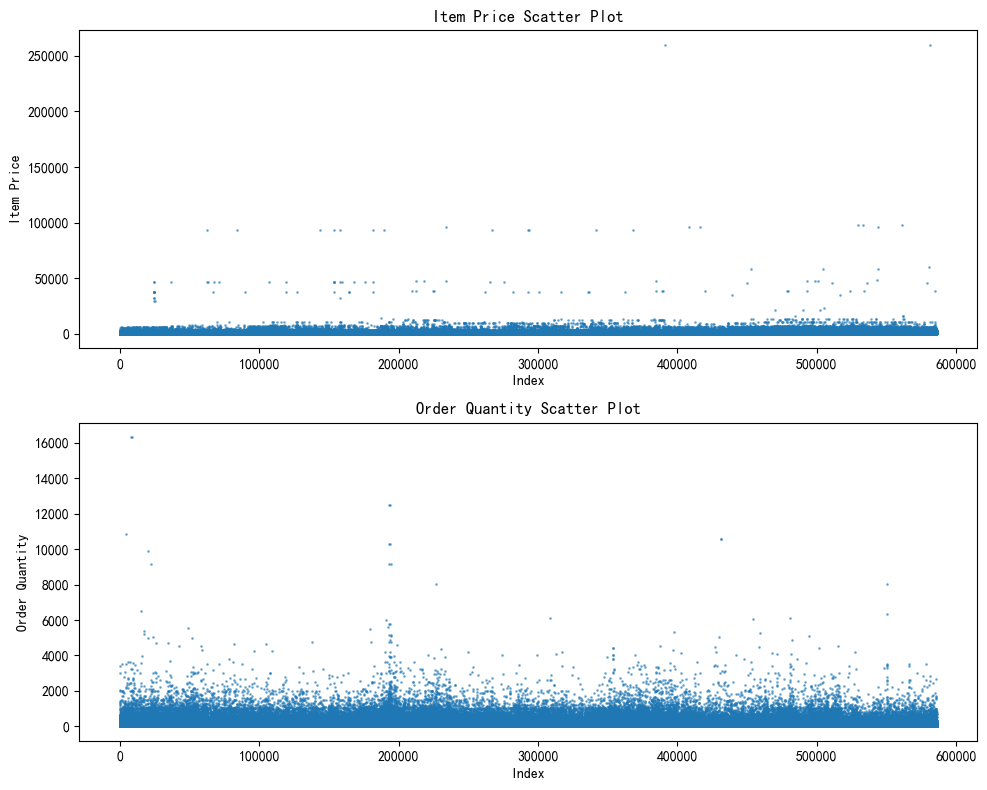

In [73]:
# Remove rows where 'item_price' and 'ord_qty' are less than 0
data1 = data1[(data1['item_price'] >= 0) & (data1['ord_qty'] >= 0)]

# Create scatter plots for 'item_price' and 'ord_qty'
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Scatter plot for 'item_price'
axs[0].scatter(range(len(data1)), data1['item_price'], s=1, alpha=0.5)
axs[0].set_title('Item Price Scatter Plot')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Item Price')

# Scatter plot for 'ord_qty'
axs[1].scatter(range(len(data1)), data1['ord_qty'], s=1, alpha=0.5)
axs[1].set_title('Order Quantity Scatter Plot')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Order Quantity')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()

In [74]:
df = data1 

In [75]:
# Group by 'item_price' and calculate the mean order quantity for each price
one_data = df.groupby('item_price', as_index=False).agg({'ord_qty': 'mean'})

print('Descriptive statistics for item_price and ord_qty:\n', one_data.describe())

Descriptive statistics for item_price and ord_qty:
           item_price       ord_qty
count   14365.000000  14365.000000
mean     2205.158618     40.786167
std      5326.057554    118.997335
min         1.000000      1.000000
25%       709.000000      6.750000
50%      1305.000000     11.000000
75%      2587.000000     39.571429
max    260014.000000   9874.000000


In [76]:
print(np.round(one_data.corr(method='spearman'),2))

            item_price  ord_qty
item_price        1.00    -0.29
ord_qty          -0.29     1.00


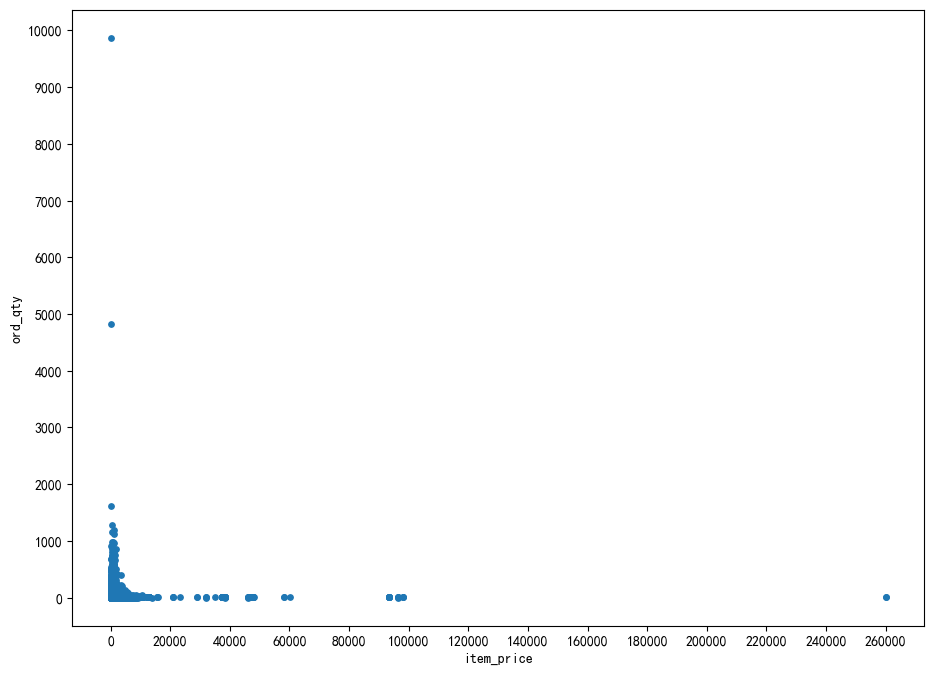

In [77]:
# Plot the average demand for each price as a scatter plot
one_data.plot(x='item_price', y='ord_qty', kind='scatter', s=15, figsize=(11, 8))
plt.ylabel('ord_qty')
from matplotlib.pyplot import MultipleLocator
plt.gca().xaxis.set_major_locator(MultipleLocator(20000))
plt.gca().yaxis.set_major_locator(MultipleLocator(1000))
plt.show()

       item_price    ord_qty  sales_volume
0            1.00  17.600000  1.760000e+01
1            1.01   6.352941  6.416471e+00
2            2.00  18.200000  3.640000e+01
3            2.01   7.157895  1.438737e+01
4            3.00  15.909091  4.772727e+01
...           ...        ...           ...
14360    98002.00   4.000000  3.920080e+05
14361    98005.00   6.000000  5.880300e+05
14362    98016.00   5.000000  4.900800e+05
14363   260006.00  15.000000  3.900090e+06
14364   260014.00   9.000000  2.340126e+06

[14365 rows x 3 columns]


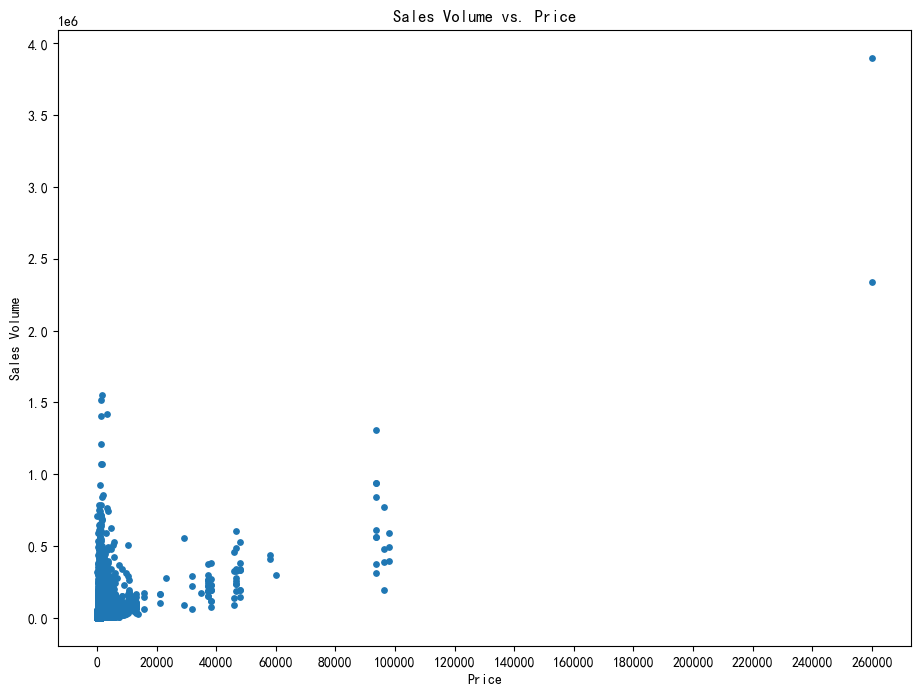

In [78]:
# Calculate the sales volume
one_data['sales_volume'] = one_data['item_price'] * one_data['ord_qty']
print(one_data)

# Plot the sales volume vs. item price as a scatter plot
plt.figure(figsize=(11, 8))
plt.scatter(one_data['item_price'], one_data['sales_volume'], s=15)
plt.gca().xaxis.set_major_locator(MultipleLocator(20000))
plt.xlabel('Price')
plt.ylabel('Sales Volume')
plt.title('Sales Volume vs. Price')
plt.show()

##### Through data analysis, there is a clear gap in the relationship between product price and average demand. We divided the product prices into different intervals: [1, 15963.38], [21009, 38334], [46006, 60007], [93532, 98016], and [260006, 260014]. These intervals are assigned five price levels: Low, Lower-Medium, Medium, Upper-Medium, and High.

In [79]:
# Divide prices into five price ranges: [1,15963.38], [21009,38334], [46006,60007], [93532,98016], {26006,260014}
data1['price_range'] = pd.cut(data1['item_price'], bins=[0, 20000, 46005, 60007, 98017, 260014])
data1['sales_volume'] = data1['item_price'] * data1['ord_qty']
item_price = ['Low', 'Lower-Medium', 'Medium', 'Upper-Medium', 'High']
print(data1.head(5))

   order_date  sales_region_code  item_code  first_cate_code  \
0  2015/10/10                101      20007              305   
1  2015/10/10                101      20082              305   
2  2015/10/10                101      20092              306   
3  2015/10/10                101      20194              305   
4  2015/10/10                101      20279              306   

   second_cate_code sales_chan_name  item_price  ord_qty price_range  \
0               412         offline        87.0      203  (0, 20000]   
1               412         offline      1156.0        7  (0, 20000]   
2               407         offline       731.0      105  (0, 20000]   
3               412         offline       205.0       40  (0, 20000]   
4               407         offline       645.0      102  (0, 20000]   

   sales_volume  
0       17661.0  
1        8092.0  
2       76755.0  
3        8200.0  
4       65790.0  


Average total demand: [93.52652903031938, 6.282608695652174, 6.485714285714286, 6.105263157894737, 12.0]


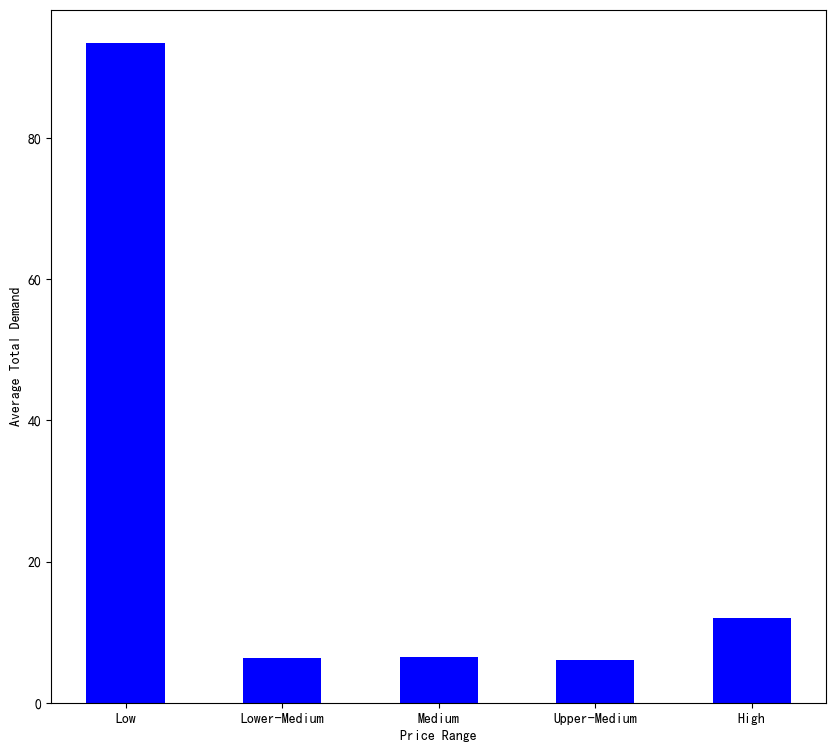

In [80]:
## Average total demand for each price range
average_ord_qty = data1.groupby('price_range', as_index=False, observed=False)['ord_qty'].mean()['ord_qty'].tolist()
print('Average total demand:', average_ord_qty)

plt.figure(figsize=(10, 9))
plt.bar(item_price, average_ord_qty, width=0.5, color='b')
plt.ylabel('Average Total Demand')
plt.xlabel('Price Range')
plt.show()

Average Sales Volume: [71835.1793663687, 218169.91304347827, 312551.28571428574, 577424.9526315789, 3120108.0]


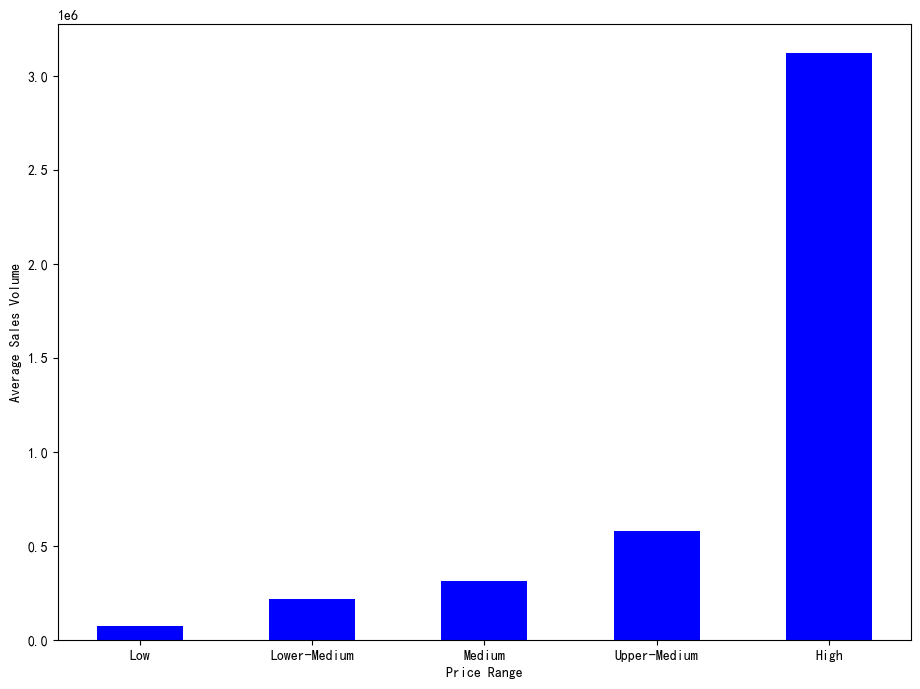

In [81]:
# Average sales volume
average_sales = data1.groupby('price_range', as_index=False, observed=False)['sales_volume'].mean()['sales_volume'].tolist()
print('Average Sales Volume:', average_sales)

plt.figure(figsize=(11, 8))
plt.bar(item_price, average_sales, width=0.5, color='b')
plt.xlabel('Price Range')
plt.ylabel('Average Sales Volume')
plt.show()

##### Analysis: Products in the low price range have a significantly higher average demand than those in other price levels. However, products in the high price range have far higher average sales revenue compared to the other levels. Since we consider high-priced products to be premium products, this suggests that the market capacity for premium products is smaller, with lower consumer attention and demand. However, the revenue from these high-end products is much higher, indicating that the high-end market cannot be ignored. On the other hand, products in the low price range have large average demand and occupy a significant share of the market. This could indicate a "low-margin, high-volume" situation. Companies should continue to solidify their position in the low-end market while appropriately expanding into the high-end market and increasing order demand.

#### 3. The impact of the region where the product is located on demand, and the characteristics of product demand in different regions

In [82]:
# Group by sales_region_code and calculate the total demand (sum of order quantities) for each region
two_data = df.groupby('sales_region_code', as_index=False)['ord_qty'].sum()
print(two_data)

   sales_region_code   ord_qty
0                101  12402968
1                102  13970148
2                103  11522186
3                104   2387653
4                105  14496002


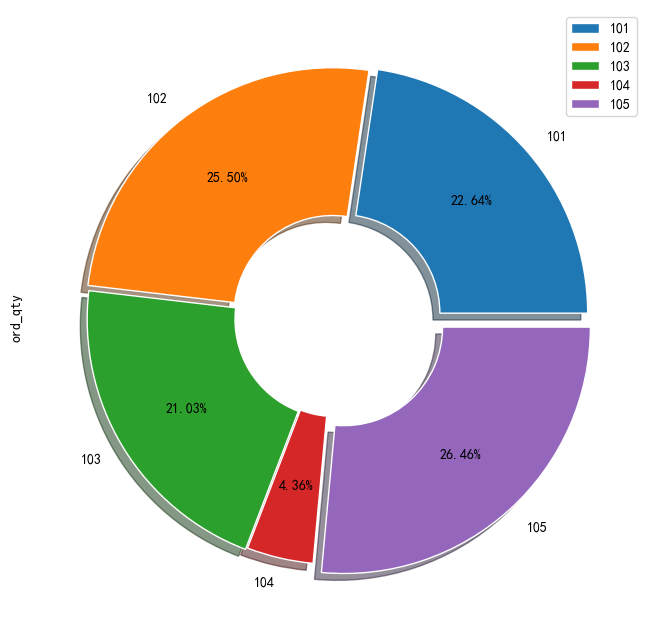

In [83]:
# Create a pie chart
two_data.plot.pie(x='sales_region_code', y='ord_qty', labels=['101', '102', '103', '104', '105'],
                  explode=(0.03, 0.02, 0.01, 0, 0.05),
                  pctdistance=0.7, autopct='%.2f%%', wedgeprops=dict(width=0.6, edgecolor="w"), shadow=True,
                  figsize=(8, 8))
plt.show()

In [84]:
# Filter data by sales region code
region1 = data.loc[data['sales_region_code'] == 101]
region2 = data.loc[data['sales_region_code'] == 102]
region3 = data.loc[data['sales_region_code'] == 103]
region4 = data.loc[data['sales_region_code'] == 104]
region5 = data.loc[data['sales_region_code'] == 105]

# Group by item_code and calculate the average order quantity for each region
b1 = region1[['item_code', 'ord_qty']].groupby(by='item_code', as_index=False).mean()
b2 = region2[['item_code', 'ord_qty']].groupby(by='item_code', as_index=False).mean()
b3 = region3[['item_code', 'ord_qty']].groupby(by='item_code', as_index=False).mean()
b4 = region4[['item_code', 'ord_qty']].groupby(by='item_code', as_index=False).mean()
b5 = region5[['item_code', 'ord_qty']].groupby(by='item_code', as_index=False).mean()

In [85]:
print('101',b1.describe())
print('102',b2.describe())
print('103',b3.describe())
print('104',b4.describe())
print('105',b5.describe())

101           item_code      ord_qty
count   1294.000000  1294.000000
mean   21030.212519    63.507840
std      606.170322    95.017748
min    20001.000000     1.000000
25%    20509.500000    14.927885
50%    21016.500000    35.793026
75%    21548.750000    75.402151
max    22084.000000  1473.969697
102           item_code      ord_qty
count   1254.000000  1254.000000
mean   21029.269537    62.332076
std      610.976899    91.043591
min    20001.000000     2.000000
25%    20495.000000    18.600614
50%    21020.500000    43.053030
75%    21558.750000    77.804147
max    22084.000000  2008.000000
103           item_code      ord_qty
count   1207.000000  1207.000000
mean   21033.485501    68.981214
std      606.355644    82.874936
min    20001.000000     2.000000
25%    20516.500000    17.448916
50%    21015.000000    40.064516
75%    21561.500000    85.070362
max    22084.000000   645.000000
104           item_code      ord_qty
count    257.000000   257.000000
mean   21047.680934    74.1

In [86]:
print('Top 5 products with the highest average demand in region 101:', b1.sort_values('ord_qty', ascending=False).head(5))
print('Top 5 products with the highest average demand in region 102:', b2.sort_values('ord_qty', ascending=False).head(5))
print('Top 5 products with the highest average demand in region 103:', b3.sort_values('ord_qty', ascending=False).head(5))
print('Top 5 products with the highest average demand in region 104:', b4.sort_values('ord_qty', ascending=False).head(5))
print('Top 5 products with the highest average demand in region 105:', b5.sort_values('ord_qty', ascending=False).head(5))

Top 5 products with the highest average demand in region 101:       item_code      ord_qty
1283      22066  1473.969697
717       21120   970.062500
375       20588   961.000000
917       21469   806.000000
1086      21758   794.000000
Top 5 products with the highest average demand in region 102:       item_code      ord_qty
703       21150  2008.000000
1164      21952  1554.000000
344       20545   406.863636
1243      22066   404.416667
453       20721   403.000000
Top 5 products with the highest average demand in region 103:       item_code  ord_qty
315       20536  645.000
156       20266  630.750
1178      22039  620.500
659       21108  595.125
255       20437  558.500
Top 5 products with the highest average demand in region 104:      item_code      ord_qty
172      21367  5002.000000
185      21493  1475.333333
199      21618  1008.000000
84       20751   331.000000
116      20937   309.452381
Top 5 products with the highest average demand in region 105:       item_code  ord_qty

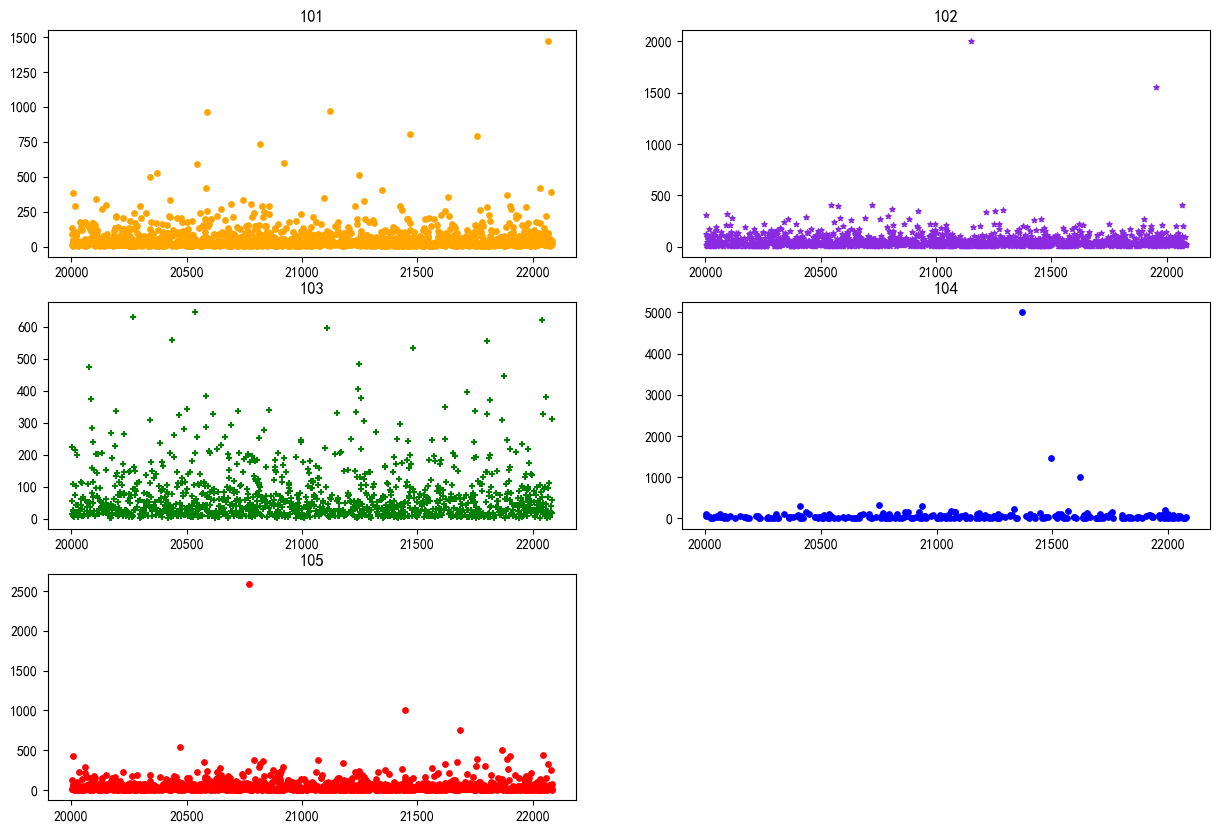

In [87]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
axs[0][0].scatter(b1['item_code'], b1['ord_qty'], color='orange',s=15)
axs[0][0].set_title('101')
axs[0][1].scatter(b2['item_code'], b2['ord_qty'], color='blueviolet',s=15,marker='*')
axs[0][1].set_title('102')
axs[1][0].scatter(b3['item_code'],b3['ord_qty'], color='green',s=15,marker='+')
axs[1][0].set_title('103')
axs[1][1].scatter(b4['item_code'], b4['ord_qty'], color='blue',s=15)
axs[1][1].set_title('104')
axs[2][0].scatter(b5['item_code'], b5['ord_qty'], color='red',s=15)
axs[2][0].set_title('105')
axs[2][1].remove()
plt.show()

##### Analysis: The number of products in Region 105 is the largest, with 1,354 products, while Region 104 has the fewest products, with only 257. Among them, the product with the code 21367 has the highest demand, while the demand for most other products is relatively small. Additionally, in Region 103, the product demand does not vary much, with no particular product standing out. However, in Regions 101, 102, 104, and 105, there are products with relatively high demand.

##### 4. Characteristics of product demand for different sales methods, online and offline

In [88]:
# Group by 'sales_chan_name' and calculate the total demand (sum of order quantities) for each channel
data1 = df.groupby(by='sales_chan_name', as_index=False).agg({'ord_qty': 'sum'})

print(data1)

  sales_chan_name   ord_qty
0         offline  36974193
1          online  17804764


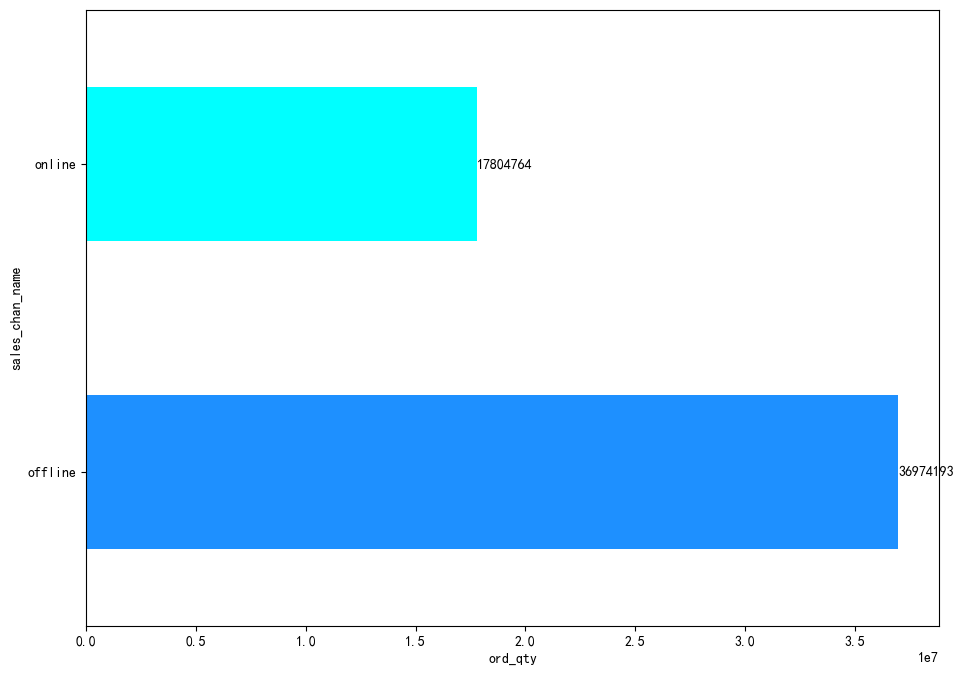

In [89]:
data1.plot.barh(x='sales_chan_name',y='ord_qty',color=['#1E90FF','cyan'], figsize=(11,8)).legend_.remove()
plt.xlabel('ord_qty')
for y,x in enumerate(data1['ord_qty']):
    plt.text(x+0.1,y,"%s"%round(x,1),va='center')

plt.show()

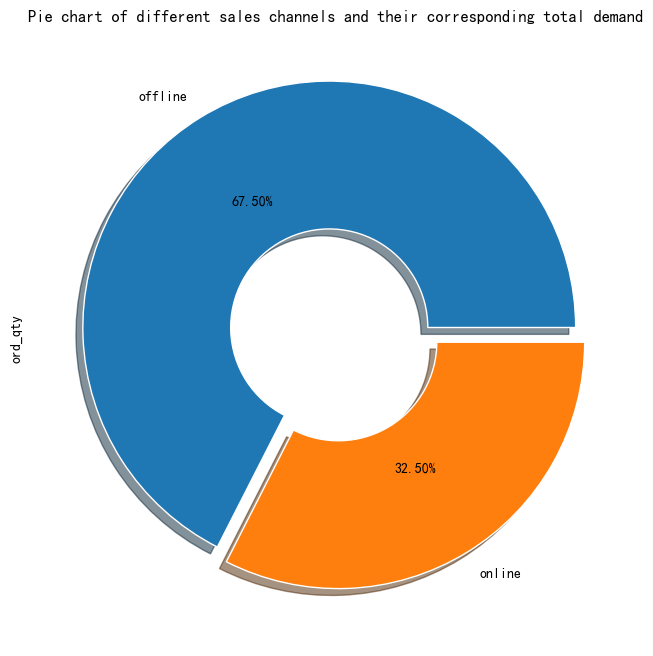

In [91]:
data1.groupby('sales_chan_name')['ord_qty'].sum().plot.pie(
    explode=[0.05, 0.02],  # Ensure length matches unique sales channels
    autopct='%.2f%%',
    wedgeprops=dict(width=0.6, edgecolor="w"),
    shadow=True,
    figsize=(8, 8)
)
plt.title('Pie chart of different sales channels and their corresponding total demand')
plt.show()

In [92]:
# Group by 'sales_chan_name' and 'item_code', and calculate the total order quantity
top = df.groupby(by=['sales_chan_name', 'item_code'], as_index=False).agg({'ord_qty': 'sum'})

online_top5 = top[top['sales_chan_name'] == 'online'].sort_values(by='ord_qty', ascending=False)
print('Top 5 products with the highest total demand in the online channel:\n', online_top5.head(5))

offline_top5 = top[top['sales_chan_name'] == 'offline'].sort_values(by='ord_qty', ascending=False)
print('Top 5 products with the highest total demand in the offline channel:\n', offline_top5.head(5))

Top 5 products with the highest total demand in the online channel:
      sales_chan_name  item_code  ord_qty
2532          online      21619   895494
2588          online      21715   663160
2264          online      21061   603813
2127          online      20820   408975
2728          online      21986   362735
Top 5 products with the highest total demand in the offline channel:
      sales_chan_name  item_code  ord_qty
1034         offline      21271  2310551
797          offline      20973  1617680
1309         offline      21619  1033017
817          offline      20996   960703
1126         offline      21394   684014


##### Analyze the impact of price and region on demand, divided by online and offline channels

                    ord_qty                                       
sales_region_code       101       102       103      104       105
sales_chan_name                                                   
offline            11542949  13634154  10173394   131335   1492361
online               860019    335994   1348792  2256318  13003641


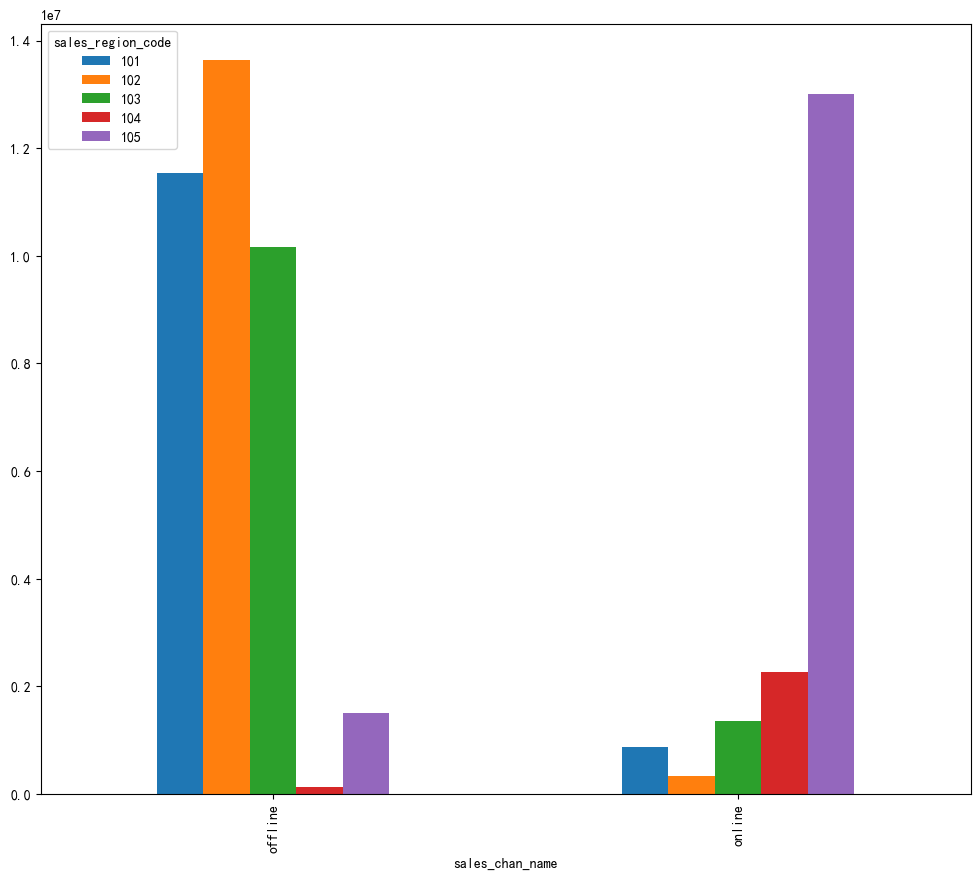

In [93]:
# Group by 'sales_chan_name' and 'sales_region_code', and calculate the total order quantity
region = df.groupby(by=['sales_chan_name', 'sales_region_code']).agg({'ord_qty': 'sum'}).unstack()

print(region)

region.plot(y='ord_qty', kind='bar', figsize=(12, 10))

plt.show()

##### For offline sales, product demand is highest in Region 102, followed by Regions 101 and 103. Regions 105 and 104 have significantly lower demand compared to the other three regions, with Region 104 having the lowest demand. For online sales, product demand is primarily concentrated in Region 105, with demand far exceeding that of the other four regions, while Region 102 has the lowest demand.

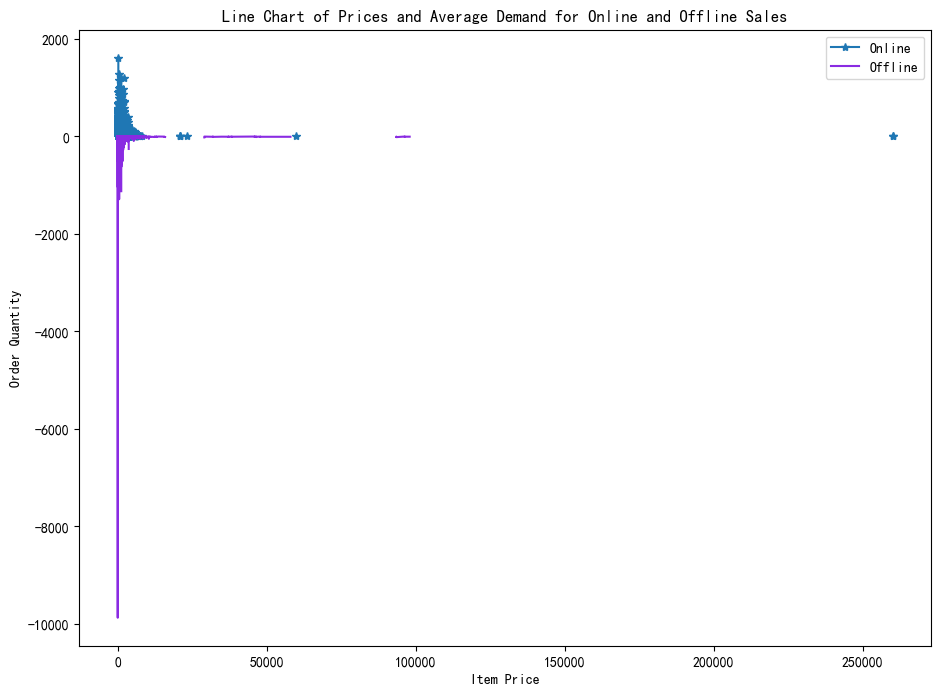

In [94]:
# Comparing online and offline sales

price = df.groupby(by=['item_price', 'sales_chan_name']).agg({'ord_qty': 'mean'}).unstack()
offline_values = -1 * price['ord_qty']['offline']
ax = price['ord_qty']['online'].plot(kind='line', marker='*', figsize=(11, 8))
offline_values.plot(kind='line', figsize=(11, 8), color='blueviolet', ax=ax)
plt.xlabel('Item Price')
plt.legend(['Online', 'Offline'])
plt.ylabel('Order Quantity')
plt.title('Line Chart of Prices and Average Demand for Online and Offline Sales')
plt.show()

##### Analysis: Overall, the price range for online sales is narrower than that for offline sales. Additionally, for the same price, the demand for online sales is higher than that for offline sales.

##### 5. Differences and similarities in product demand across different categories

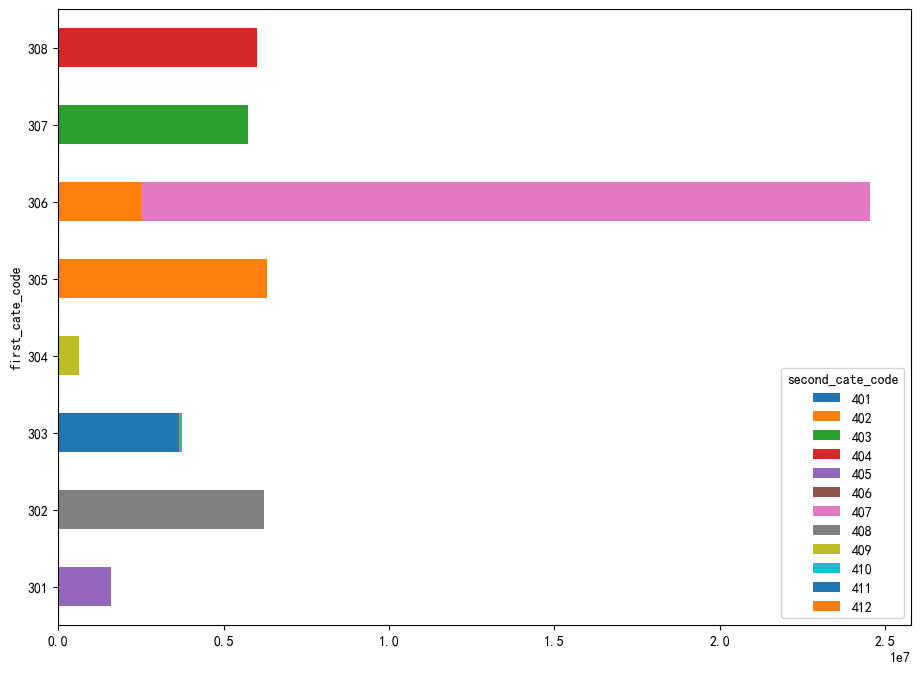

In [ ]:
data1 = df.groupby(by=['first_cate_code', 'second_cate_code']).agg({'ord_qty': 'sum'})
data3 = df.groupby(by=['first_cate_code', 'second_cate_code']).agg({'ord_qty': 'sum'}).unstack()
data3.plot(kind='barh', y='ord_qty', stacked=True, figsize=(11, 8))
# Plot of total demand by category and subcategory
plt.show()

In [ ]:
# Categorizing sales

name = df.groupby(by=['first_cate_code', 'second_cate_code', 'sales_chan_name'], as_index=False).agg({'ord_qty': 'sum'})
print(name)

    first_cate_code  second_cate_code sales_chan_name   ord_qty
0               301               405         offline    445434
1               301               405          online   1141300
2               302               408         offline   3988155
3               302               408          online   2234364
4               303               401         offline   2692791
5               303               401          online    914032
6               303               406         offline     47029
7               303               406          online        17
8               303               410         offline     81558
9               303               410          online       134
10              303               411         offline     13716
11              303               411          online        27
12              304               409         offline    546329
13              304               409          online     72217
14              305               412   

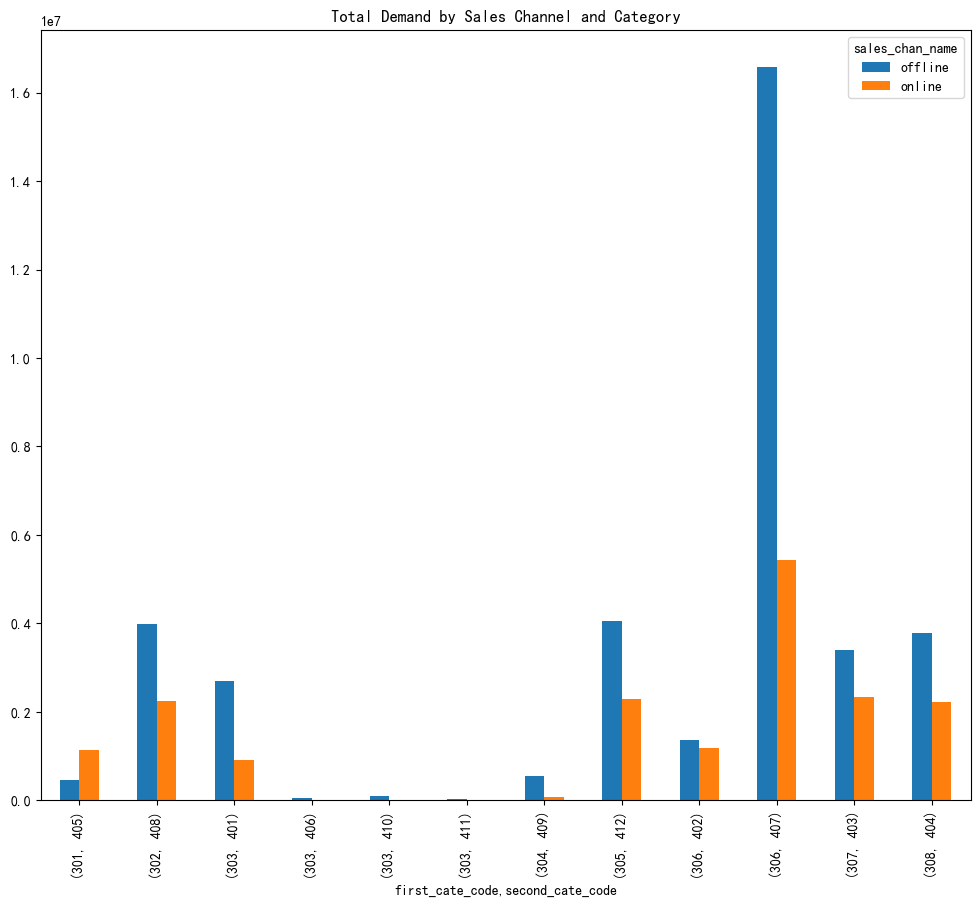

In [ ]:
name1 = df.groupby(by=['first_cate_code', 'second_cate_code', 'sales_chan_name']).agg({'ord_qty': 'sum'}).unstack()
name1.plot(y='ord_qty', kind='bar', figsize=(12, 10))
plt.title('Total Demand by Sales Channel and Category')
plt.show()

##### Analysis: From the chart and table, it can be seen that the total demand for products in category 306, subcategory 407, under both sales channels, is significantly higher than that of other categories. In contrast, the total demand for the three products in category 303 is relatively low, all not exceeding 10,000. This indicates that category 306, subcategory 407, has a larger market with higher consumer attention. Overall, sales across all categories tend to favor offline sales.

In [ ]:
# Region
region = df.groupby(by=['first_cate_code', 'second_cate_code', 'sales_region_code'], as_index=False).agg({'ord_qty': 'sum'})
print(region)

    first_cate_code  second_cate_code  sales_region_code  ord_qty
0               301               405                101    51961
1               301               405                102   223807
2               301               405                103   166150
3               301               405                104   489238
4               301               405                105   655578
5               302               408                101   765073
6               302               408                102  1588418
7               302               408                103  2006151
8               302               408                105  1862877
9               303               401                101   938729
10              303               401                102   836941
11              303               401                103  1089311
12              303               401                105   741842
13              303               406                101     4301
14        

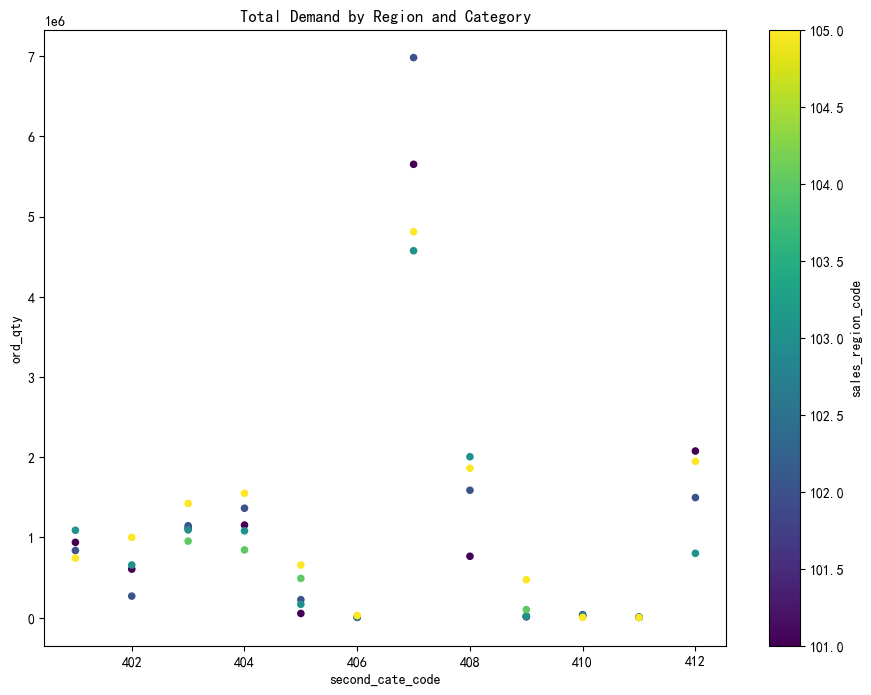

In [ ]:
region.plot.scatter(x='second_cate_code', y='ord_qty', c='sales_region_code', cmap="viridis", s=20, figsize=(11,8))
plt.title('Total Demand by Region and Category')
plt.show()

##### The demand for subcategories 402, 403, 404, 405, 406, and 409 is highest in region 105. The demand in all regions for subcategory 407 is the highest compared to the total demand of other subcategories in those regions. On the other hand, the demand in regions where subcategories 406, 410, and 411 are located is relatively low.

In [ ]:
# Price
price = data.groupby(by=['item_price', 'second_cate_code'], as_index=True).agg({'ord_qty': 'mean'}).unstack()
print(price.head(5))

                    ord_qty                                                 \
second_cate_code        401   402  403 404   405 406  407   408  409   410   
item_price                                                                   
1.00              14.333333   NaN  NaN NaN   NaN NaN  2.0   NaN  NaN   NaN   
1.01               3.000000   NaN  8.0 NaN   NaN NaN  6.0   7.0  6.0  11.0   
2.00              16.500000   6.0  NaN NaN  38.0 NaN  NaN   NaN  NaN   NaN   
2.01               5.000000   6.0  7.5 NaN   NaN NaN  NaN  11.0  6.5   NaN   
3.00              13.636364  10.0  NaN NaN   NaN NaN  6.0   NaN  NaN   NaN   

                                
second_cate_code 411       412  
item_price                      
1.00             NaN       NaN  
1.01             NaN  3.333333  
2.00             NaN  6.000000  
2.01             NaN  7.857143  
3.00             NaN  4.500000  


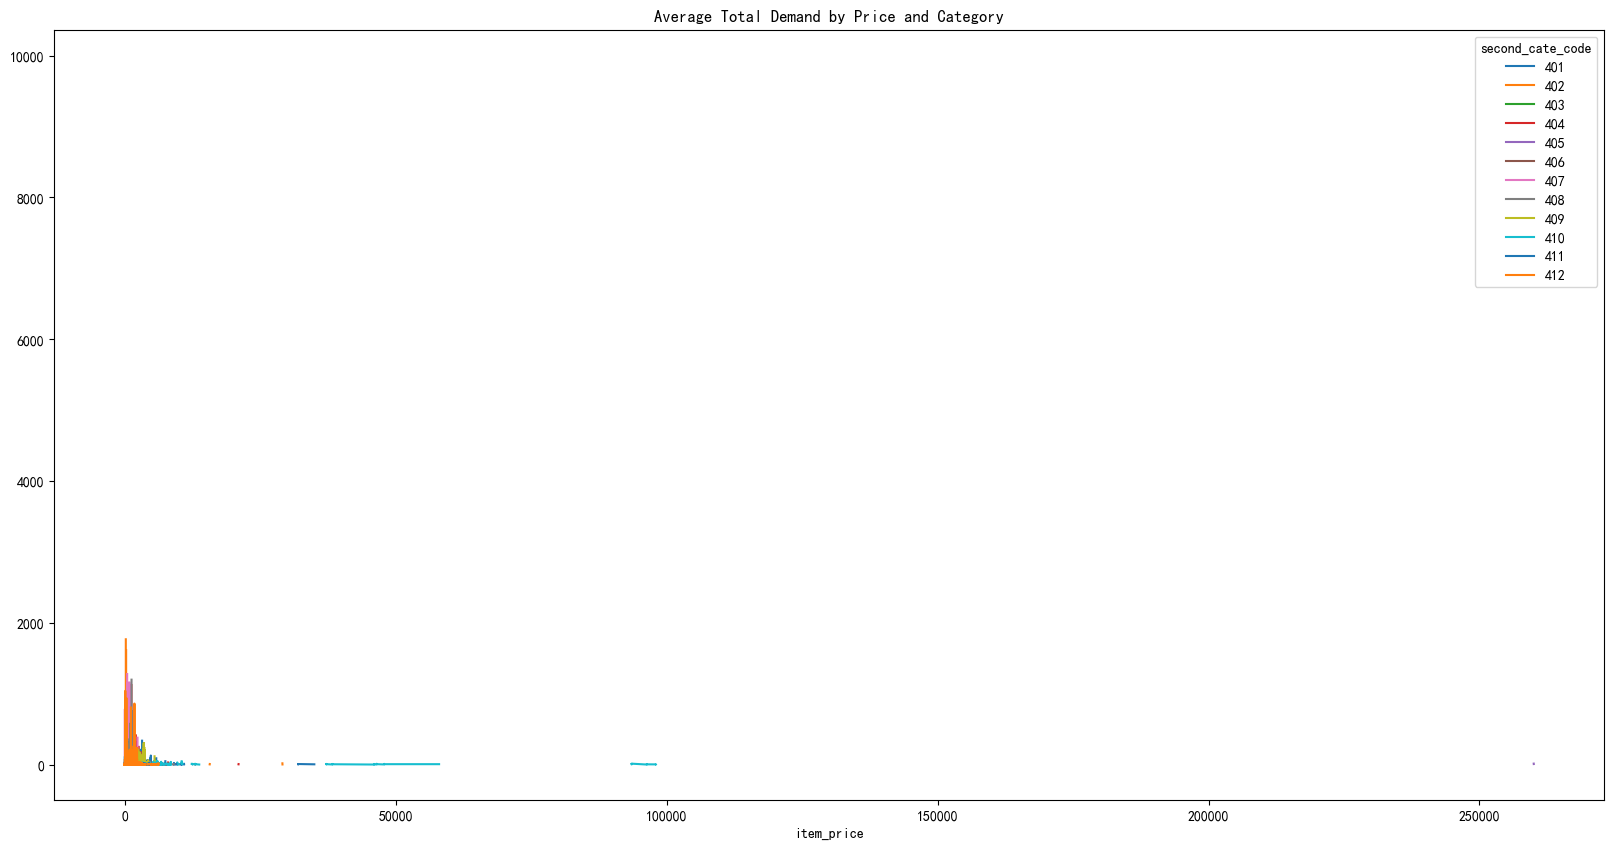

In [ ]:
price.plot(kind='line', y='ord_qty', figsize=(20,10))
plt.title('Average Total Demand by Price and Category')
plt.show()

##### Analysis: We can clearly see that the orange line fluctuates significantly and is concentrated around certain prices, with the demand reaching its peak. This indicates that the demand for subcategory 402 products is higher at similar price points compared to other subcategory products. The light blue line, representing subcategory 410, shows a layered pattern with a large price range, yet still maintains a relatively small order demand. This suggests that the price elasticity is high.

In [ ]:
data=df.copy()
data['order_date']= pd.to_datetime(data['order_date'])
data.set_index('order_date', inplace=True)

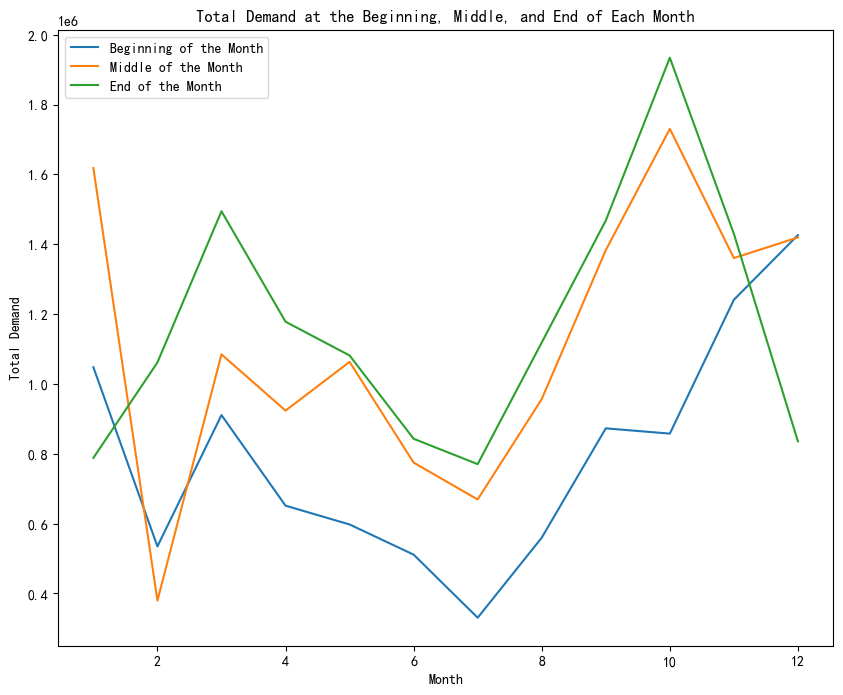

In [ ]:
# The first 7 days of each month are considered as the beginning of the month
first = data[data.index.day <= 7]

# The 12th to 18th days of each month are considered as the middle of the month
middle = data[(data.index.day >= 12) & (data.index.day <= 18)]

# The last 7 days of each month are considered as the end of the month
last = data[data.index.day >= (data.index.days_in_month - 6)]

# Calculate the total demand for each month
mean_first = first.groupby(first.index.month)['ord_qty'].sum()
mean_middle = middle.groupby(middle.index.month)['ord_qty'].sum()
mean_last = last.groupby(last.index.month)['ord_qty'].sum()

# Plot the total demand chart
plt.figure(figsize=(10, 8))
plt.plot(mean_first.index, mean_first.values, label='Beginning of the Month')
plt.plot(mean_middle.index, mean_middle.values, label='Middle of the Month')
plt.plot(mean_last.index, mean_last.values, label='End of the Month')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Total Demand')
plt.title('Total Demand at the Beginning, Middle, and End of Each Month')
plt.show()

##### Analysis: The total demand at the beginning, middle, and end of each month over the past three years does not show significant differences between adjacent months, and tends to fluctuate within a certain range. The peaks generally occur in March and in October-November, while the lows are typically seen in January-February and July. It can be observed that the changes in total demand across the three time periods follow a regular pattern, indicating that consumer demand for the products varies with the time of year.

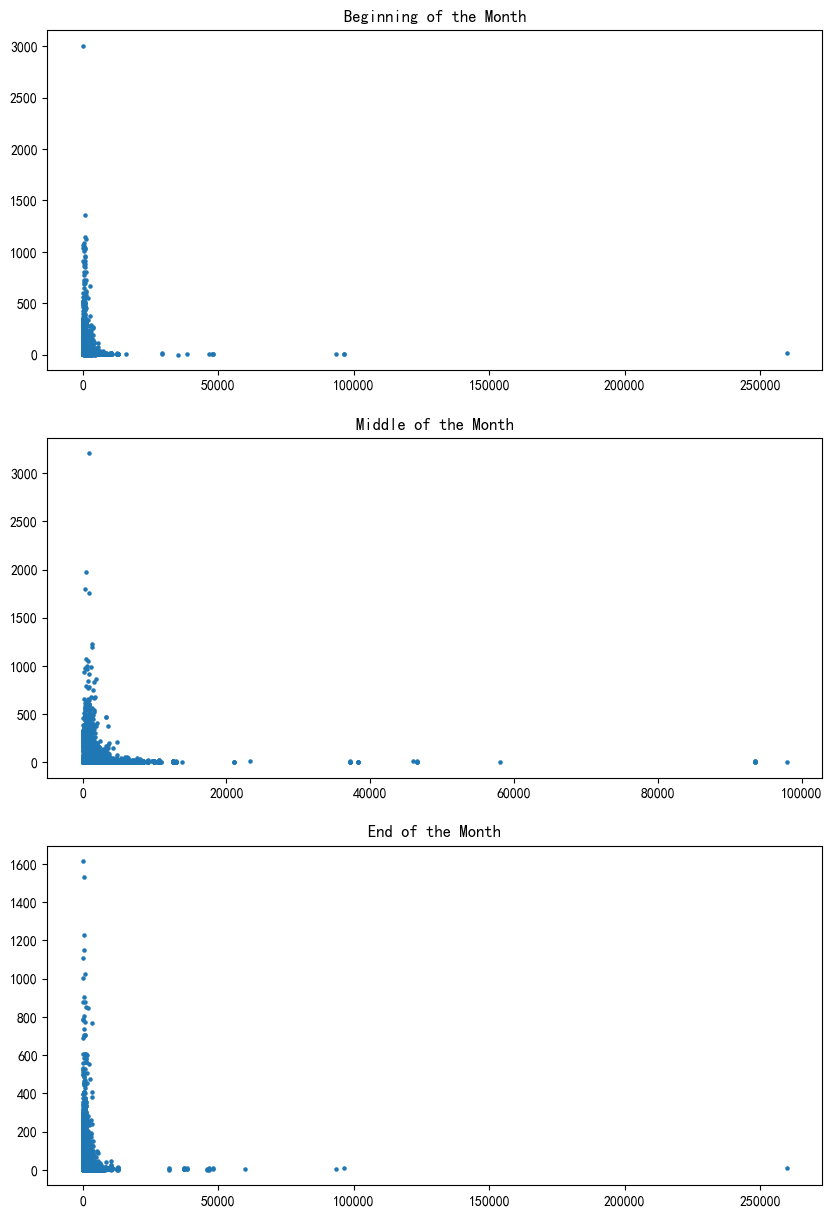

In [ ]:
# Price
price_first = first.groupby('item_price').agg({'ord_qty': 'mean'})
price_middle = middle.groupby('item_price').agg({'ord_qty': 'mean'})
price_last = last.groupby('item_price').agg({'ord_qty': 'mean'})

# Plot the average price distribution scatter plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Beginning of the month
axs[0].scatter(price_first.index, price_first.values, s=5, label='Beginning of the Month')
axs[0].set_title('Beginning of the Month')

# Middle of the month
axs[1].scatter(price_middle.index, price_middle.values, s=5, label='Middle of the Month')
axs[1].set_title('Middle of the Month')

# End of the month
axs[2].scatter(price_last.index, price_last.values, s=5, label='End of the Month')
axs[2].set_title('End of the Month')

plt.show()

##### Analysis: The demand at the beginning, middle, and end of the month is concentrated in the [0, 500] range, with prices focused on the lower price tiers. This indicates that there is a large market demand for low-end products each month. Additionally, both the beginning and end of the month show demand for higher price tiers, suggesting that the high-end market is also significant and should not be overlooked by businesses.

Beginning of the Month:
    sales_region_code  ord_qty
0                101  2129504
1                102  2427414
2                103  2054633
3                104   384468
4                105  2543378
Middle of the Month:
    sales_region_code  ord_qty
0                101  2947217
1                102  3409806
2                103  2826531
3                104   518126
4                105  3661425
End of the Month:
    sales_region_code  ord_qty
0                101  3235566
1                102  3530972
2                103  2903674
3                104   704894
4                105  3628216


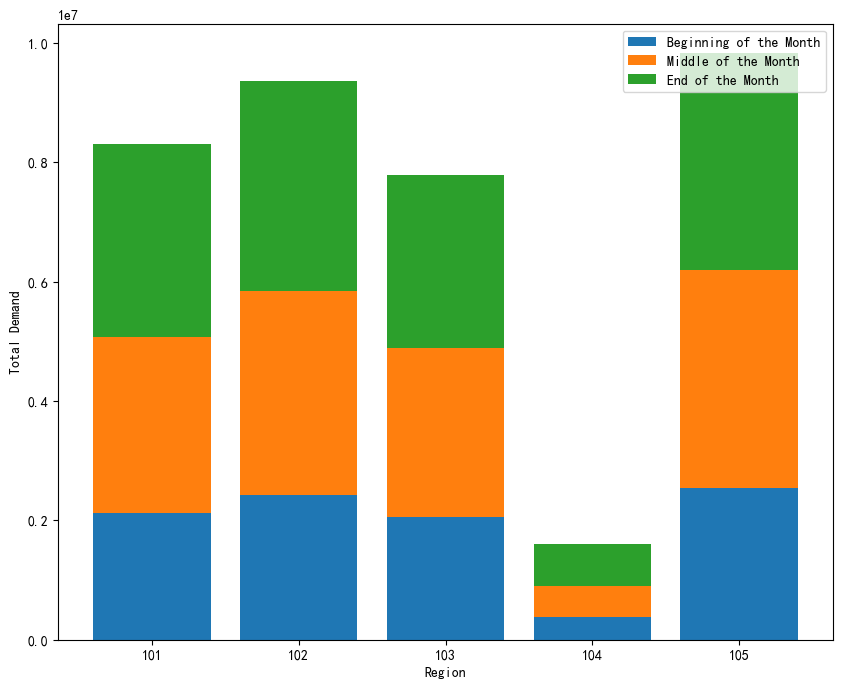

In [ ]:
# Region

# Beginning of the month
region_first = first.groupby('sales_region_code', as_index=False).agg({'ord_qty': 'sum'})
print('Beginning of the Month:\n', region_first)

# Middle of the month
region_middle = middle.groupby('sales_region_code', as_index=False).agg({'ord_qty': 'sum'})
print('Middle of the Month:\n', region_middle)

# End of the month
region_last = last.groupby('sales_region_code', as_index=False).agg({'ord_qty': 'sum'})
print('End of the Month:\n', region_last)

# Plot the total demand bar chart for each region
plt.figure(figsize=(10, 8))
plt.bar(region_first['sales_region_code'], region_first['ord_qty'], label='Beginning of the Month')
plt.bar(region_middle['sales_region_code'], region_middle['ord_qty'], label='Middle of the Month', bottom = region_first['ord_qty'])
plt.bar(region_last['sales_region_code'], region_last['ord_qty'], label='End of the Month', bottom = region_first['ord_qty'] + region_middle['ord_qty'])
plt.legend()
plt.xlabel('Region')
plt.ylabel('Total Demand')
plt.show()

Sales at the Beginning of the Month:
                  ord_qty
sales_chan_name         
offline          6501554
online           3037843
Sales in the Middle of the Month:
                  ord_qty
sales_chan_name         
offline          8895688
online           4467417
Sales at the End of the Month:
                  ord_qty
sales_chan_name         
offline          9453233
online           4550089


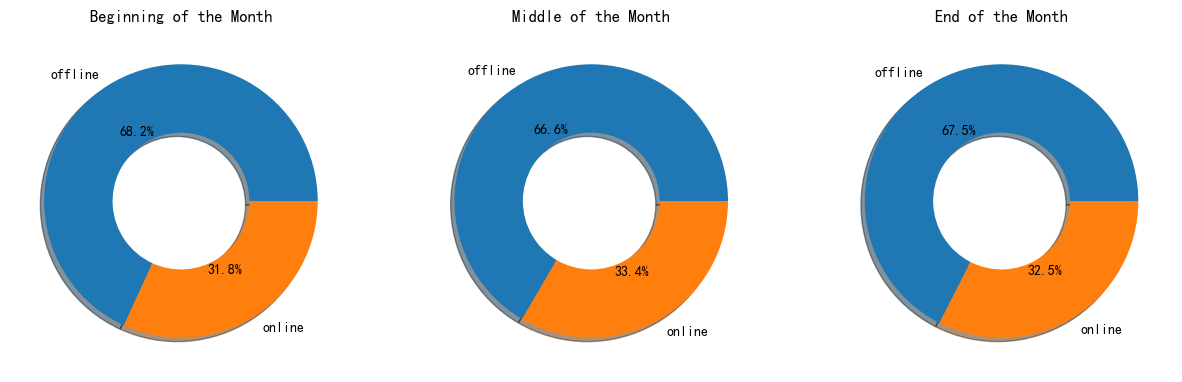

In [ ]:
# Sales Channel

# Beginning of the month sales
sales_first = first.groupby('sales_chan_name').agg({'ord_qty': 'sum'})
print('Sales at the Beginning of the Month:\n', sales_first)

# Middle of the month sales
sales_middle = middle.groupby('sales_chan_name').agg({'ord_qty': 'sum'})
print('Sales in the Middle of the Month:\n', sales_middle)

# End of the month sales
sales_last = last.groupby('sales_chan_name').agg({'ord_qty': 'sum'})
print('Sales at the End of the Month:\n', sales_last)

# Plot pie charts for sales distribution
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Beginning of the month pie chart
axs[0].pie(sales_first['ord_qty'], labels=sales_first.index, autopct='%1.1f%%', wedgeprops=dict(width=0.5), shadow=True)
axs[0].set_title('Beginning of the Month')

# Middle of the month pie chart
axs[1].pie(sales_middle['ord_qty'], labels=sales_middle.index, autopct='%1.1f%%', wedgeprops=dict(width=0.5), shadow=True)
axs[1].set_title('Middle of the Month')

# End of the month pie chart
axs[2].pie(sales_last['ord_qty'], labels=sales_last.index, autopct='%1.1f%%', wedgeprops=dict(width=0.5), shadow=True)
axs[2].set_title('End of the Month')

plt.show()

Categories at the Beginning of the Month:
                                   ord_qty
first_cate_code second_cate_code         
301             405                281799
302             408               1025254
303             401                560663
                406                  8741
                410                 13710
                411                  1924
304             409                103089
305             412               1014858
306             402                513052
                407               4019058
307             403                981051
308             404               1016198
Categories in the Middle of the Month:
                                   ord_qty
first_cate_code second_cate_code         
301             405                363238
302             408               1550956
303             401                897213
                406                 11495
                410                 17621
                411                

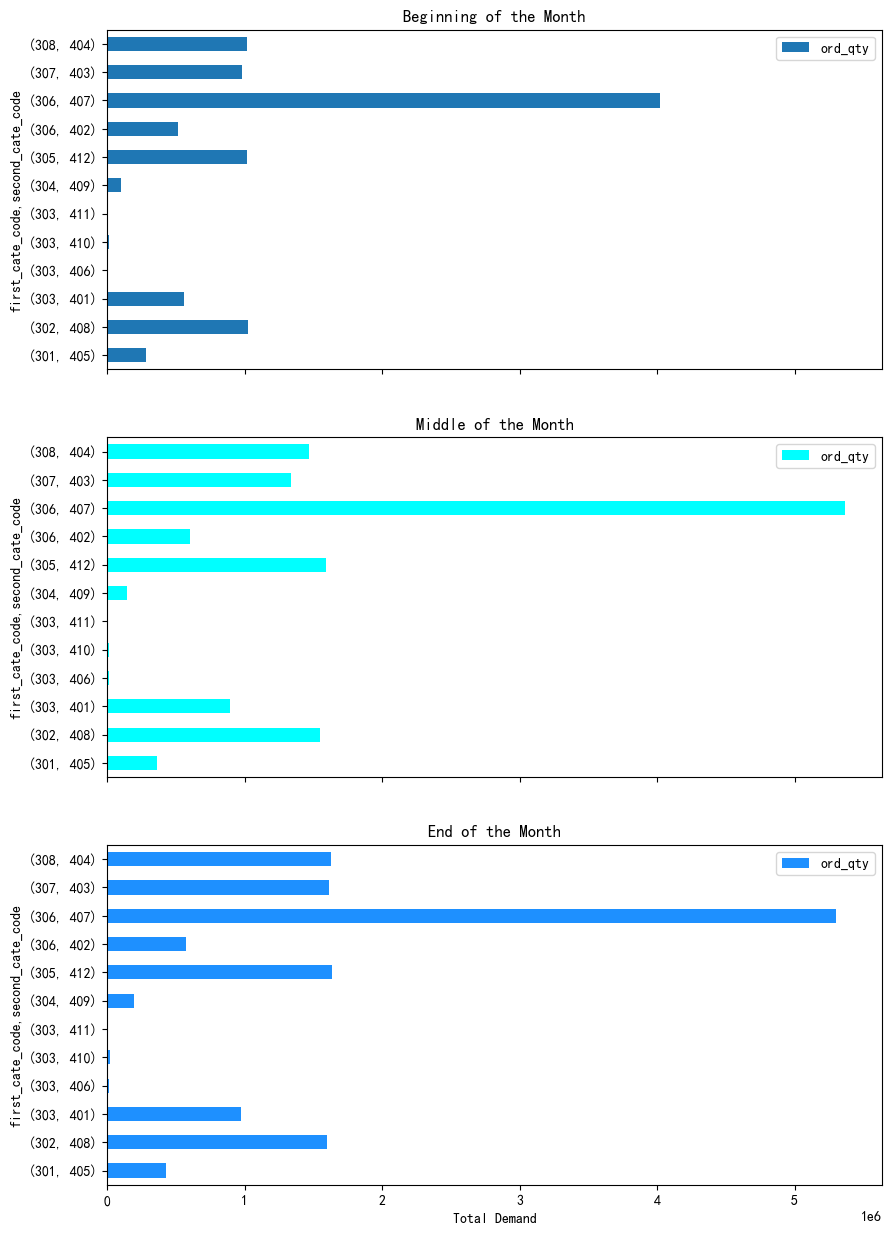

In [ ]:
# Major Category - Subcategory

# Beginning of the month categories
lei_first = first.groupby(by=['first_cate_code', 'second_cate_code']).agg({'ord_qty': 'sum'})
print('Categories at the Beginning of the Month:\n', lei_first)

# Middle of the month categories
lei_middle = middle.groupby(by=['first_cate_code', 'second_cate_code']).agg({'ord_qty': 'sum'})
print('Categories in the Middle of the Month:\n', lei_middle)

# End of the month categories
lei_last = last.groupby(by=['first_cate_code', 'second_cate_code']).agg({'ord_qty': 'sum'})
print('Categories at the End of the Month:\n', lei_last)

# Plotting the bar charts for categories
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Beginning of the month bar chart
lei_first.plot(kind='barh', ax=axs[0])
axs[0].set_title('Beginning of the Month')

# Middle of the month bar chart
lei_middle.plot(kind='barh', color='cyan', ax=axs[1])
axs[1].set_title('Middle of the Month')

# End of the month bar chart
lei_last.plot(kind='barh', color='#1E90FF', ax=axs[2])
axs[2].set_title('End of the Month')

plt.xlabel('Total Demand')
plt.show()

##### Analysis: The total demand for products in category (major category 306, subcategory 407) at the beginning, middle, and end of the month is significantly higher than that of other categories. Additionally, it can be seen from the chart that the order demand for each category across the three time periods shows little variation.

##### 6. The impact of holidays on product demand

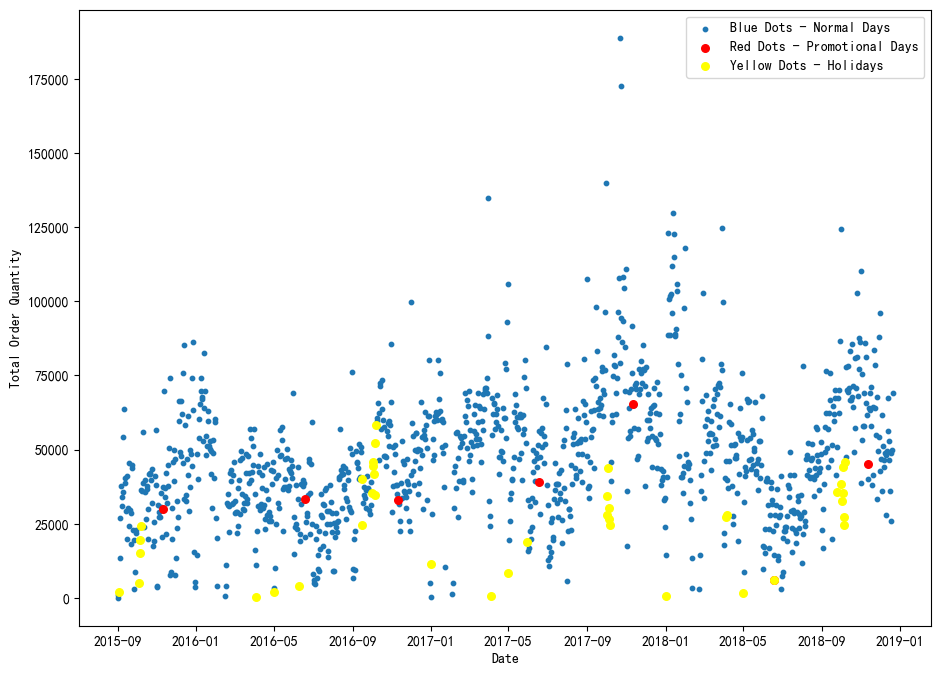

In [ ]:
data = df.copy()
data['order_date'] = pd.to_datetime(data['order_date'])

# Aggregate total order quantity by date
self_data = data.groupby(by='order_date', as_index=False).agg({'ord_qty': 'sum'})

# Define promotional and holiday dates
promotional_days = [
    '2015-06-18', '2015-11-11',
    '2016-06-18', '2016-11-11',
    '2017-06-18', '2017-11-11',
    '2018-06-18', '2018-11-11'
]

holidays = [
    '2015-09-03', # Victory Day (adjusted holiday)
    '2015-10-01', '2015-10-02', '2015-10-03', '2015-10-04', '2015-10-05', '2015-10-06', '2015-10-07', # National Day
    '2016-01-01', # New Year
    '2016-02-07', '2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-13', # Spring Festival
    '2016-04-04', # Qingming Festival
    '2016-05-01', # Labor Day
    '2016-06-09', # Dragon Boat Festival
    '2016-09-15', '2016-09-16', # Mid-Autumn Festival
    '2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07', # National Day
    '2017-01-01', # New Year
    '2017-01-27', '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02', # Spring Festival
    '2017-04-04', # Qingming Festival
    '2017-05-01', # Labor Day
    '2017-05-30', # Dragon Boat Festival
    '2017-10-01', '2017-10-02', '2017-10-03', '2017-10-04', '2017-10-05', '2017-10-06', # National Day and Mid-Autumn
    '2018-01-01', # New Year
    '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21', # Spring Festival
    '2018-04-05', '2018-04-06', # Qingming Festival
    '2018-05-01', # Labor Day
    '2018-06-18', # Dragon Boat Festival
    '2018-09-24', # Mid-Autumn Festival
    '2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07', # National Day
]

# Convert promotional and holiday days to DataFrame
promotional_data = data.loc[data['order_date'].isin(pd.to_datetime(promotional_days))]
holiday_data = data.loc[data['order_date'].isin(pd.to_datetime(holidays))]

# Aggregate total order quantity for promotional and holiday days
promotional_aggregated = promotional_data.groupby(by='order_date', as_index=False).agg({'ord_qty': 'sum'})
holiday_aggregated = holiday_data.groupby(by='order_date', as_index=False).agg({'ord_qty': 'sum'})

# Plot the data
plt.figure(figsize=(11, 8))

# Scatter plot for original data
plt.scatter(self_data['order_date'], self_data['ord_qty'].values, label='Blue Dots - Normal Days', s=10)

# Scatter plot for promotional days
plt.scatter(promotional_aggregated['order_date'], promotional_aggregated['ord_qty'].values, color='r', label='Red Dots - Promotional Days', s=30)

# Scatter plot for holiday days
plt.scatter(holiday_aggregated['order_date'], holiday_aggregated['ord_qty'].values, color='yellow', label='Yellow Dots - Holidays', s=30)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Total Order Quantity')
plt.legend()
plt.show()

##### 7. The impact of promotion days on product demand

In [ ]:
data.index = data['order_date']

Categories = data.groupby(by=[data.index.month, 'second_cate_code'], as_index=True).agg({'ord_qty': 'sum'}).unstack()
Categories1 = data.groupby(by=[data.index.month, 'second_cate_code'], as_index=True).agg({'ord_qty': 'sum'})

print(Categories1)

                             ord_qty
order_date second_cate_code         
1          401                341820
           402                278861
           403                619826
           404                579464
           405                162157
...                              ...
12         408                638165
           409                 60318
           410                  6098
           411                  1099
           412                616838

[144 rows x 1 columns]


In [ ]:
Categories2 = data.groupby('second_cate_code', as_index=True).agg({'ord_qty': 'sum'})
print('Categories:\n', Categories2)

Categories:
                    ord_qty
second_cate_code          
401                3606823
402                2530857
403                5729615
404                5995423
405                1586734
406                  47046
407               22021023
408                6222519
409                 618546
410                  81692
411                  13743
412                6324936


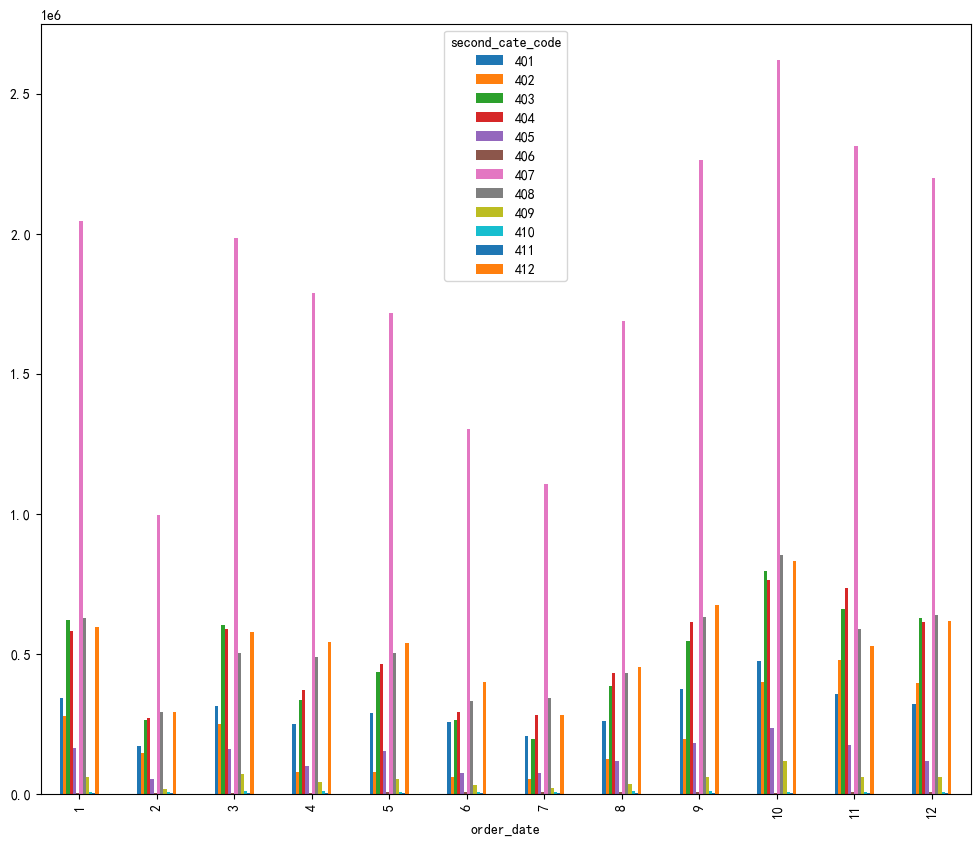

In [ ]:
Categories.plot(y='ord_qty',kind='bar',figsize=(12, 10))
plt.show()

##### Analysis: Promotion days in China is Novermber 11th,

                    ord_qty
sales_region_code          
101                12402968
102                13970148
103                11522186
104                 2387653
105                14496002


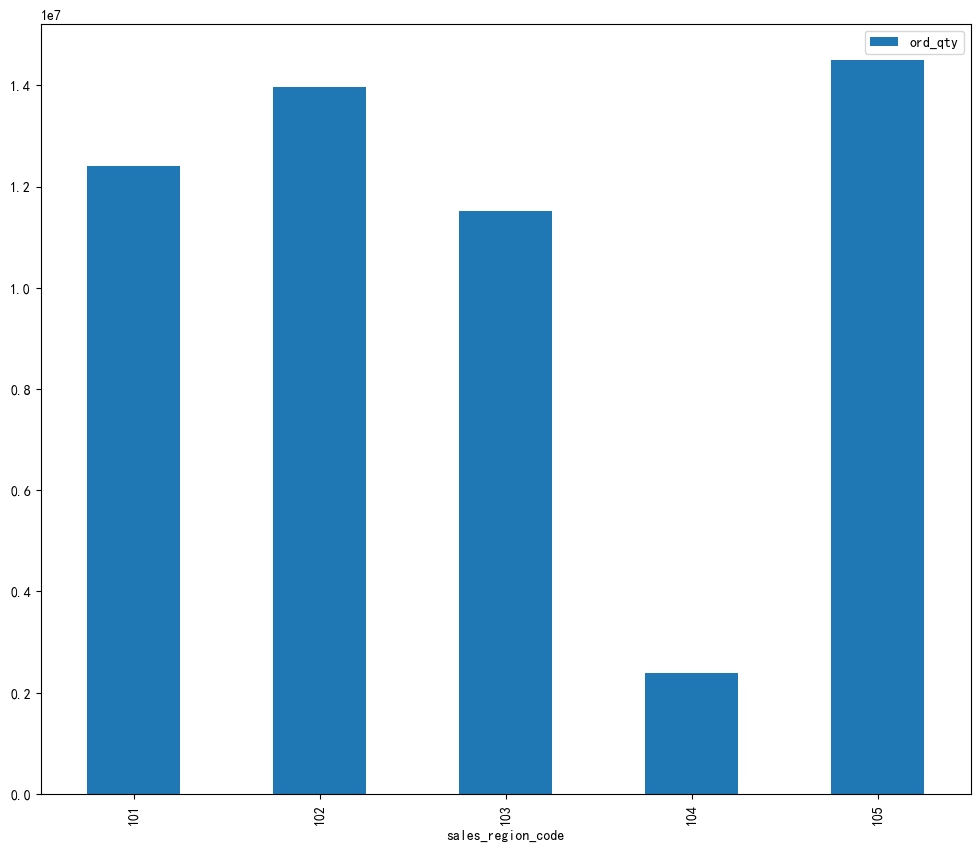

In [ ]:
region = data.groupby(by='sales_region_code').agg({'ord_qty': 'sum'})
print(region)

region.plot.bar(figsize=(12, 10))
plt.show()

                  ord_qty
sales_chan_name          
offline          36974193
online           17804764


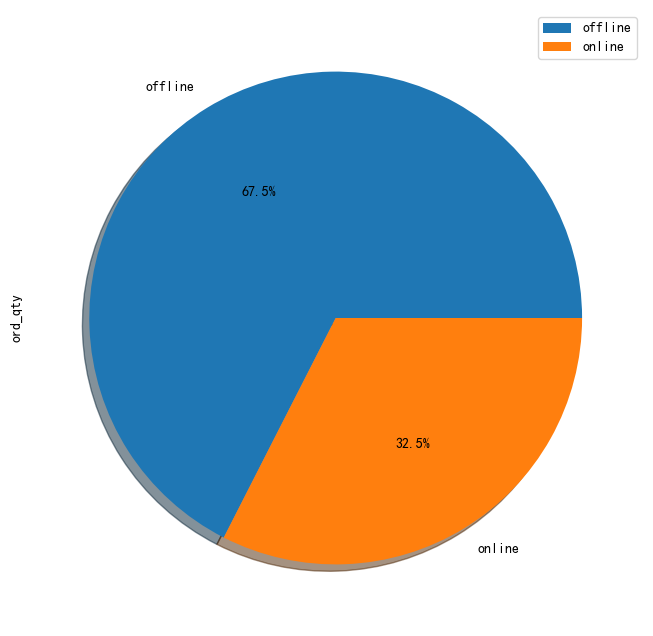

In [ ]:
sales = data.groupby(by='sales_chan_name').agg({'ord_qty': 'sum'})
print(sales)

sales.plot(kind='pie', y='ord_qty', figsize=(8, 8), autopct='%1.1f%%', shadow=True)
plt.show()

In [ ]:
# Different time periods
copy_data = data.copy()
copy_data.set_index('order_date', inplace=True)

# The first 7 days of each month are considered the beginning of the month
first = copy_data[copy_data.index.day <= 7]

# Days 12-18 of each month are considered the middle of the month
middle = copy_data[(copy_data.index.day >= 12) & (copy_data.index.day <= 18)]

# The last 7 days of each month are considered the end of the month
last = copy_data[copy_data.index.day >= (copy_data.index.days_in_month - 6)]

# Calculate the total demand for each time period
sum_first = first.groupby(first.index.month)['ord_qty'].sum()
sum_middle = middle.groupby(middle.index.month)['ord_qty'].sum()
sum_last = last.groupby(last.index.month)['ord_qty'].sum()

# Output the results
print('Total demand for promotional days at the beginning of the month\n', sum(first['ord_qty']))
print('Total demand for promotional days in the middle of the month\n', sum(middle['ord_qty']))
print('Total demand for promotional days at the end of the month\n', sum(last['ord_qty']))


Total demand for promotional days at the beginning of the month
 9539397
Total demand for promotional days in the middle of the month
 13363105
Total demand for promotional days at the end of the month
 14003322


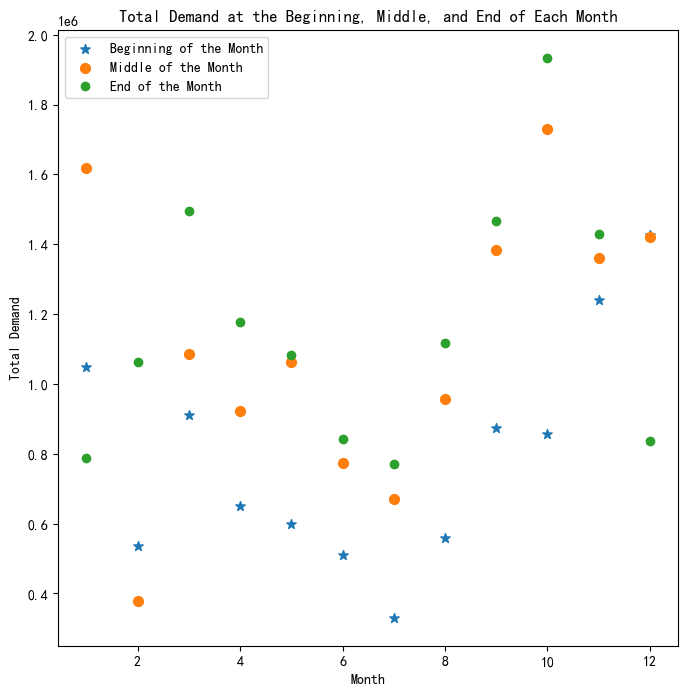

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(sum_first.index, sum_first.values, marker='*', s=50, label='Beginning of the Month')
plt.scatter(sum_middle.index, sum_middle.values, s=50, label='Middle of the Month')
plt.scatter(sum_last.index, sum_last.values, label='End of the Month')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Total Demand')
plt.title('Total Demand at the Beginning, Middle, and End of Each Month')

plt.show()

      item_price  ord_qty
2419       531.0   139902
2495       541.0   136148
2479       539.0   132753
2426       532.0   129686
2432       533.0   129274
      item_code  ord_qty
1077      21271  2339806
1362      21619  1928511
827       20973  1625675
847       20996   974793
1445      21715   715046


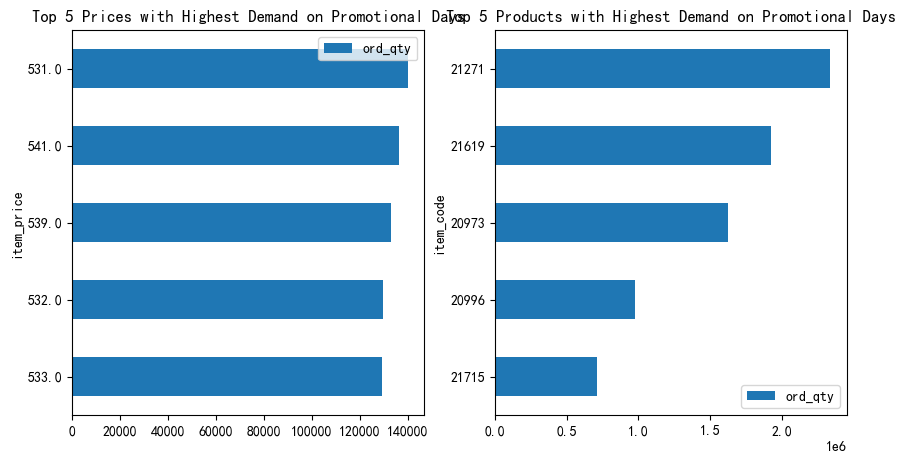

In [ ]:
# Price

# Grouping by item_price and summing the order quantities, sorted in descending order of total order quantity
price = data.groupby('item_price', as_index=False).agg({'ord_qty': 'sum'}).sort_values(by='ord_qty', ascending=False)
print(price.head(5))

# Grouping by item_code and summing the order quantities, sorted in descending order of total order quantity
code = data.groupby('item_code', as_index=False).agg({'ord_qty': 'sum'}).sort_values(by='ord_qty', ascending=False)
print(code.head(5))

# Plotting the graphs
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Top 5 prices with highest demand
price.head(5).plot(kind='barh', x='item_price', y='ord_qty', ax=axs[0])
axs[0].set_title('Top 5 Prices with Highest Demand on Promotional Days')
axs[0].invert_yaxis()

# Top 5 products with highest demand
code.head(5).plot(kind='barh', x='item_code', y='ord_qty', ax=axs[1])
axs[1].set_title('Top 5 Products with Highest Demand on Promotional Days')
axs[1].invert_yaxis()

plt.show()

In [ ]:
data=df.copy()
data['order_date']= pd.to_datetime(data['order_date'])
data.index=data['order_date']

                    season   ord_qty
order_date                          
1            First Quarter  12884656
2           Second Quarter  11247708
3            Third Quarter  12053864
4           Fourth Quarter  18592729


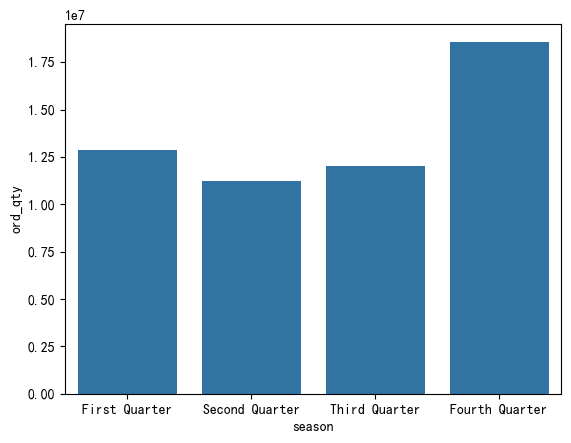

In [ ]:
# Four Quarters and Corresponding Total Demand

# Grouping the data by quarter and aggregating the total order quantity
season = data.groupby(data.index.quarter).agg({'ord_qty': 'sum'})  # Changed np.sum to 'sum'
a = pd.DataFrame({"season": ['First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter'], 
                  "ord_qty": season['ord_qty'].T})
print(a)

# Creating a bar plot for different quarters and their corresponding total demand
sns.barplot(data=a, x="season", y="ord_qty")

plt.show()

              ord_qty                                 
order_date       2015       2016       2017       2018
order_date                                            
1                 NaN  3342190.0  4353418.0  5189048.0
2                 NaN  3134103.0  4554570.0  3559035.0
3            832725.0  2791345.0  4568376.0  3861418.0
4           3315098.0  4404605.0  6006351.0  4866675.0


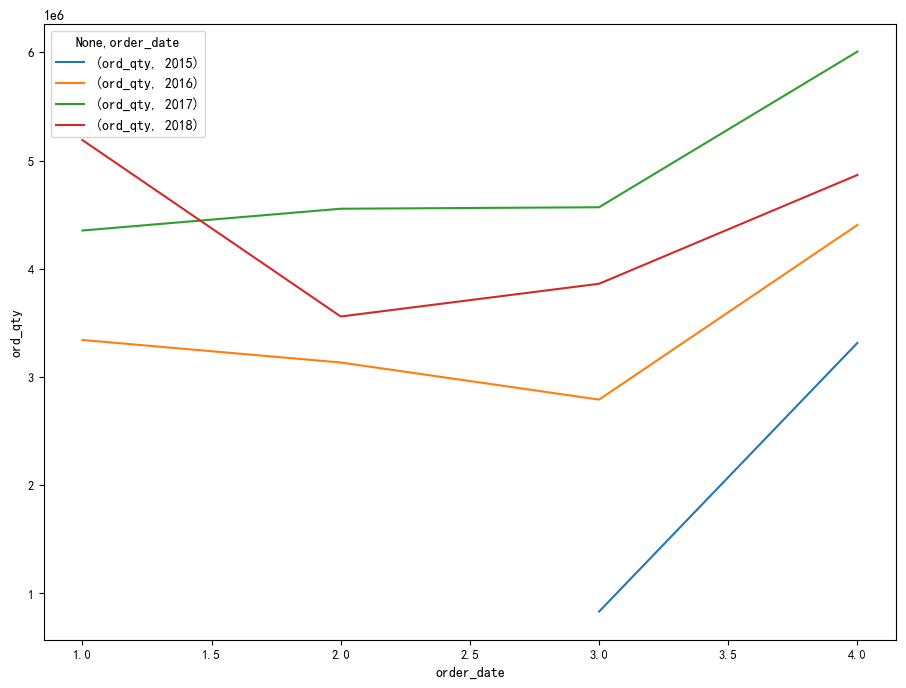

In [ ]:
# Grouping by both quarter and year, and summing the order quantity
season1 = data.groupby(by=[data.index.quarter, data.index.year]).agg({'ord_qty': 'sum'}).unstack()
print(season1)

# Plotting the data
season1.plot(figsize=(11, 8))
plt.ylabel('ord_qty')
plt.xlabel('order_date')
plt.tick_params(labelsize=9)
plt.show()

                              ord_qty
order_date sales_region_code         
1          101                3086061
           102                3493961
           103                2854377
           104                 358229
           105                3092028
2          101                2689544
           102                2900771
           103                2286575
           104                 427860
           105                2942958
3          101                2590046
           102                2959231
           103                2408325
           104                 530943
           105                3565319
4          101                4037317
           102                4616185
           103                3972909
           104                1070621
           105                4895697


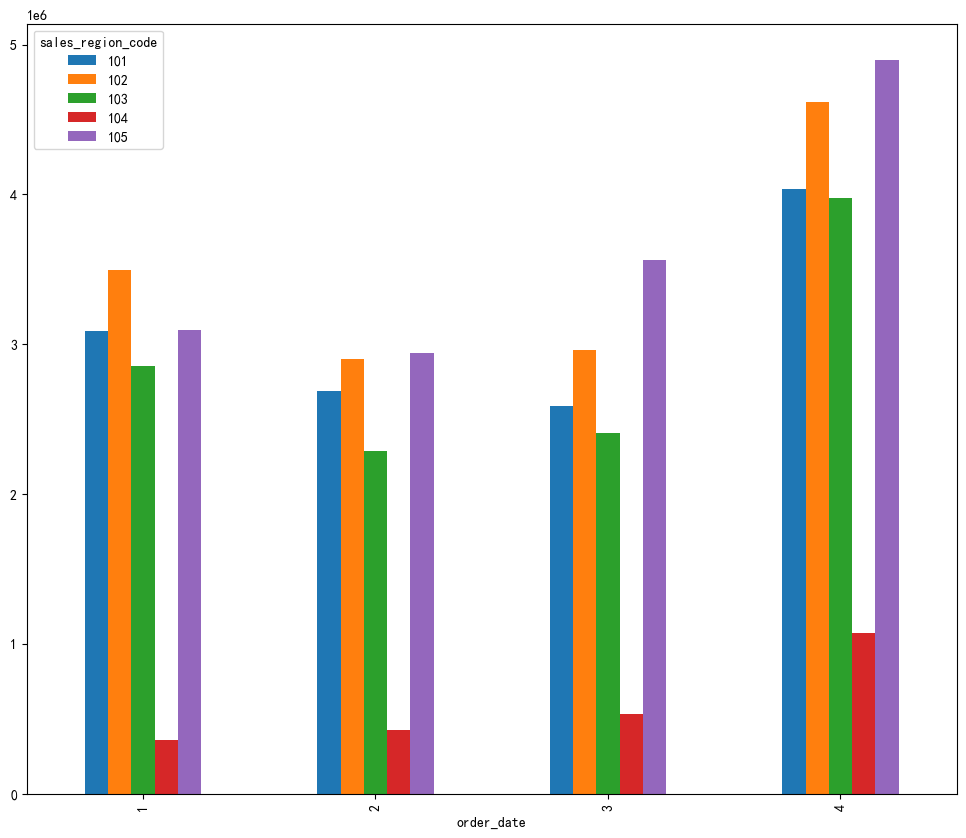

In [ ]:
region = data.groupby(by=[data.index.quarter, 'sales_region_code']).agg({'ord_qty': 'sum'}).unstack()
region1 = data.groupby(by=[data.index.quarter, 'sales_region_code']).agg({'ord_qty': 'sum'})
print(region1)

region.plot(y='ord_qty', kind='bar', figsize=(12, 10))

plt.show()

                  ord_qty         
sales_chan_name   offline   online
order_date                        
1                 9561373  3323283
2                 7670729  3576979
3                 7669057  4384807
4                12073034  6519695


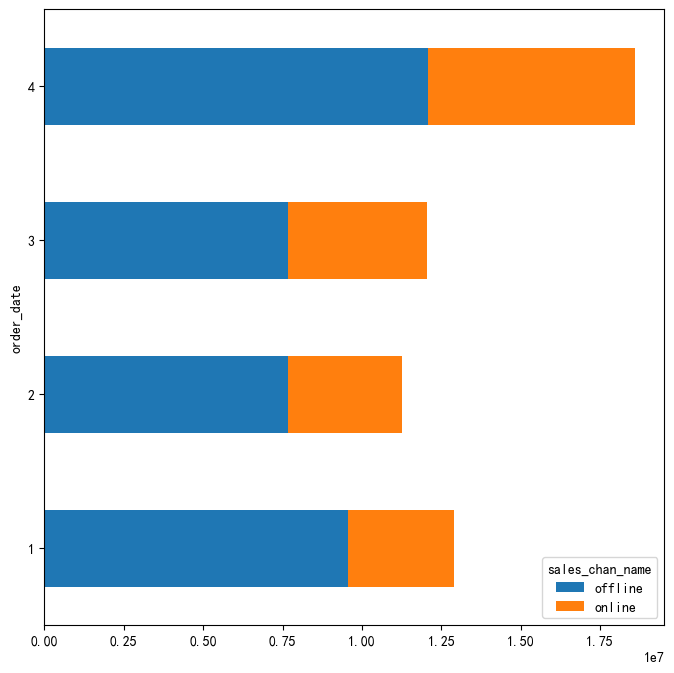

In [ ]:
sales = data.groupby(by=[data.index.quarter, 'sales_chan_name']).agg({'ord_qty': 'sum'}).unstack()
print(sales)

sales.plot(kind='barh', y='ord_qty', figsize=(8, 8), stacked=True)

plt.show()

                                             ord_qty
order_date first_cate_code second_cate_code         
1          301             405                371630
           302             408               1420866
           303             401                827342
                           406                  8188
                           410                 19499
                           411                  5249
           304             409                146351
           305             412               1467238
           306             402                672730
                           407               5025566
           307             403               1484381
           308             404               1435616
2          301             405                324169
           302             408               1319117
           303             401                789257
                           406                 12647
                           410                

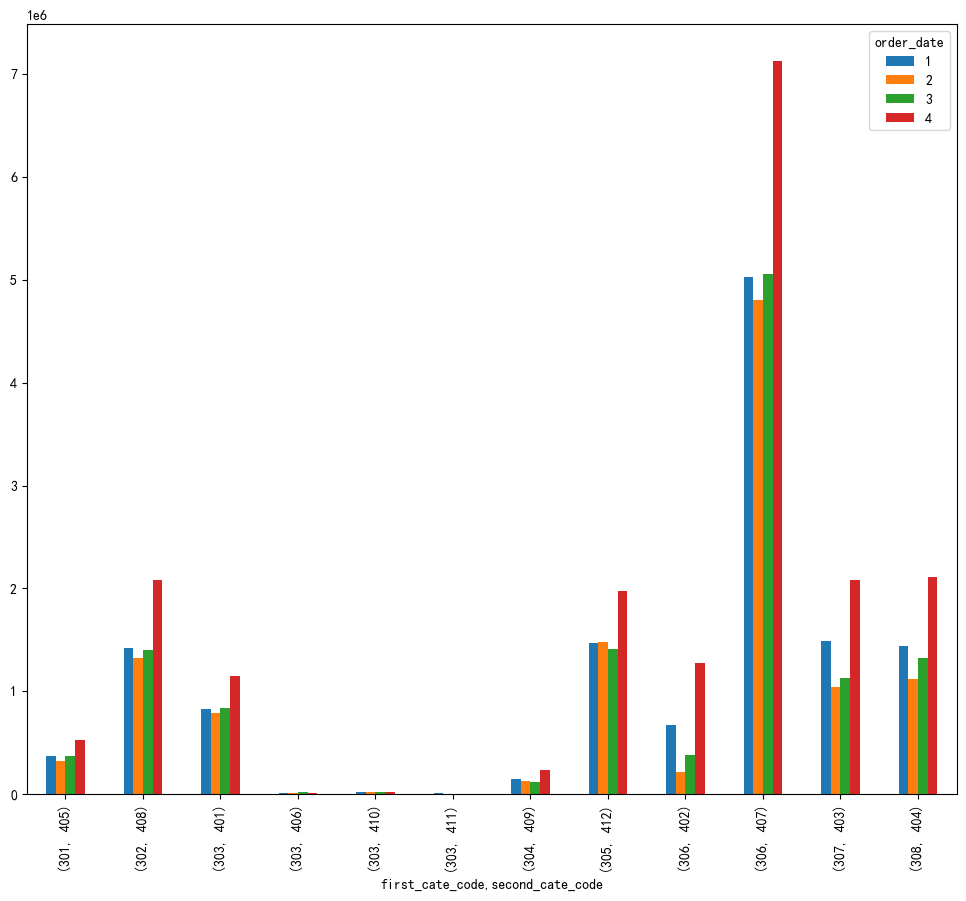

In [ ]:
categories = data.groupby(by=['first_cate_code', 'second_cate_code', data.index.quarter]).agg({'ord_qty': 'sum'}).unstack()

categories1 = data.groupby(by=[data.index.quarter, 'first_cate_code', 'second_cate_code']).agg({'ord_qty': 'sum'})
print(categories1)

categories.plot(y='ord_qty', kind='bar', figsize=(12, 10))
plt.show()

In [ ]:
price = data.groupby(by=['item_price', data.index.quarter]).agg({'ord_qty': 'sum'}).unstack()

print(price)

print('Count of prices for each season:\n', price.count())

           ord_qty                   
order_date       1      2     3     4
item_price                           
1.00           NaN   86.0   NaN   2.0
1.01           3.0   28.0   5.0  72.0
2.00           NaN  125.0  44.0  13.0
2.01           6.0   50.0  16.0  64.0
3.00           NaN  114.0  10.0  51.0
...            ...    ...   ...   ...
98002.00       NaN    NaN   4.0   NaN
98005.00       NaN    NaN   6.0   NaN
98016.00       NaN    NaN   5.0   NaN
260006.00      NaN    NaN   NaN  15.0
260014.00      NaN    NaN   9.0   NaN

[14365 rows x 4 columns]
Count of prices for each season:
          order_date
ord_qty  1             5386
         2             6451
         3             7539
         4             8532
dtype: int64
